In [2]:
import os
import time

import torch
import torchvision.io

ckpt = torch.load("/home/doved/Downloads/checkpoint-86.pth.tar", map_location="cpu")
ckpt

{'epoch': 86,
 'arch': 'resnet50',
 'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 0.0170, -0.0061, -0.0434,  ..., -0.0258, -0.0037,  0.0245],
                         [ 0.0020,  0.0256,  0.0646,  ..., -0.0058,  0.0337, -0.0156],
                         [ 0.0174,  0.0205,  0.0694,  ..., -0.0023,  0.0101,  0.0109],
                         ...,
                         [-0.0099,  0.0191,  0.0401,  ...,  0.0240, -0.0557, -0.0412],
                         [-0.0166, -0.0345,  0.0606,  ...,  0.0030, -0.0187, -0.0362],
                         [ 0.0061, -0.0541,  0.0253,  ...,  0.0001,  0.0160, -0.0042]],
               
                        [[ 0.0085, -0.0118,  0.0107,  ...,  0.0185, -0.0017, -0.0038],
                         [ 0.0076,  0.0154, -0.0033,  ...,  0.0134, -0.0225,  0.0095],
                         [ 0.0043, -0.0131, -0.0186,  ...,  0.0135, -0.0143, -0.0183],
                         ...,
                         [ 0.0136, -0.0583, -0.0079,  ..., -

In [5]:
ckpt["state_dict"].keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we

In [18]:
import numpy as np

b = np.load("/home/doved/Data/Imagenet64_train/train_data_batch_1.npz")
b

NpzFile '/home/doved/Data/Imagenet64_train/train_data_batch_1.npz' with keys: data, mean, labels

In [19]:
img1 = b["data"][10000]

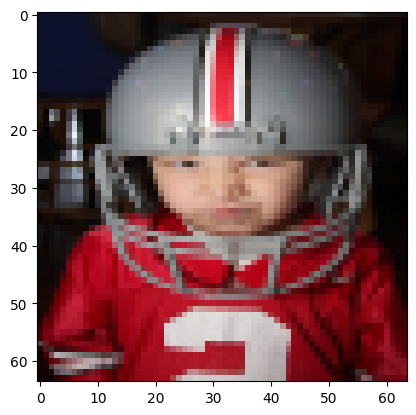

In [17]:
from matplotlib import pyplot as plt
plt.imshow(img1)

In [27]:
import torch
import torchvision
from pathlib import Path
from tqdm import tqdm
import os

labels = b["labels"]
data = b["data"]
filenames = {}
dest = Path("/home/doved/Data/Imagenet64/train")
for i in tqdm(range(len(labels))):
    img = data[i]
    label = labels[i] - 1
    if label not in filenames:
        filenames[label] = 0
        os.mkdir(dest/f"{label}")
    p = dest/f"{label}"/f"{filenames[label]}.png"
    filenames[label] += 1
    torchvision.io.write_png(torch.tensor(img.reshape(3, 64, 64)), str(p))

100%|██████████| 128116/128116 [01:39<00:00, 1284.70it/s]


In [28]:
for batch in range(2, 6):
    b = np.load(f"/home/doved/Data/Imagenet64_train/train_data_batch_{batch}.npz")
    labels = b["labels"]
    data = b["data"]
    dest = Path("/home/doved/Data/Imagenet64/train")
    for i in tqdm(range(len(labels))):
        img = data[i]
        label = labels[i] - 1
        if label not in filenames:
            filenames[label] = 0
            os.mkdir(dest/f"{label}")
        p = dest/f"{label}"/f"{filenames[label]}.png"
        filenames[label] += 1
        torchvision.io.write_png(torch.tensor(img.reshape(3, 64, 64)), str(p))

100%|██████████| 128116/128116 [01:38<00:00, 1296.85it/s]


In [29]:
import torch
import torchvision
from pathlib import Path
from tqdm import tqdm
import os

b = np.load(f"/home/doved/Data/Imagenet64_val/val_data.npz")
labels = b["labels"]
data = b["data"]
val_filenames = {}
dest = Path("/home/doved/Data/Imagenet64/val")
for i in tqdm(range(len(labels))):
    img = data[i]
    label = labels[i] - 1
    if label not in val_filenames:
        val_filenames[label] = 0
        os.mkdir(dest/f"{label}")
    p = dest/f"{label}"/f"{val_filenames[label]}.png"
    val_filenames[label] += 1
    torchvision.io.write_png(torch.tensor(img.reshape(3, 64, 64)), str(p))

100%|██████████| 50000/50000 [00:37<00:00, 1323.68it/s]


In [4]:
img1 = img1.reshape(3, 64, 64)
img1.shape

(3, 64, 64)

In [8]:
img1 = np.transpose(img1, (1, 2, 0))
img1.shape

(64, 64, 3)

In [10]:
img1 = np.ascontiguousarray(img1)

In [5]:
"aaabcdef".removeprefix("aa")

'abcdef'

In [6]:
"123.jpeg"[:-5]

'123'

In [15]:
img1.astype(float)

array([[[ 14.,  16.,  39.],
        [ 14.,  17.,  40.],
        [ 14.,  17.,  41.],
        ...,
        [ 28.,  18.,  14.],
        [ 29.,  17.,  13.],
        [ 25.,  15.,  11.]],

       [[ 13.,  17.,  39.],
        [ 14.,  17.,  40.],
        [ 13.,  17.,  42.],
        ...,
        [ 16.,   7.,   5.],
        [ 19.,   7.,   5.],
        [ 11.,   4.,   3.]],

       [[ 14.,  16.,  39.],
        [ 14.,  17.,  41.],
        [ 14.,  17.,  43.],
        ...,
        [ 19.,   7.,   5.],
        [ 19.,   7.,   5.],
        [  8.,   3.,   3.]],

       ...,

       [[ 16.,   5.,   3.],
        [ 19.,   6.,   4.],
        [ 85.,  57.,  61.],
        ...,
        [116.,   8.,  22.],
        [129.,  13.,  28.],
        [140.,  17.,  33.]],

       [[ 15.,   5.,   3.],
        [ 17.,   5.,   4.],
        [ 25.,  12.,  13.],
        ...,
        [131.,  16.,  31.],
        [123.,  13.,  26.],
        [132.,  19.,  32.]],

       [[ 15.,   4.,   3.],
        [ 17.,   4.,   3.],
        [ 17.,  

In [1]:
import timm

timm.list_models("resnet50")

['resnet50']

In [2]:
resnet50 = timm.create_model("resnet50")
efficientnet_b0 = timm.create_model("efficientnet_b0")

In [3]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad) / 1024 / 1024

count_parameters(resnet50)

24.373085021972656

In [4]:
count_parameters(efficientnet_b0)

5.043552398681641

In [3]:
import torch

x = torch.randn(12, 3, 224, 224)

In [6]:
%timeit resnet50(x)

927 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
efficientnet_v2 = timm.create_model("efficientnetv2_s")

In [8]:
count_parameters(efficientnet_v2)

20.46440887451172

In [9]:
%timeit efficientnet_v2(x)

1.22 s ± 28.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
efficientnet_b2 = timm.create_model("efficientnet_b2")
count_parameters(efficientnet_b2)

8.687967300415039

In [11]:
%timeit efficientnet_b2(x)

839 ms ± 27.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [14]:
dir(resnet50)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [16]:
[x[0] for x in resnet50.named_parameters()]

['conv1.weight',
 'bn1.weight',
 'bn1.bias',
 'layer1.0.conv1.weight',
 'layer1.0.bn1.weight',
 'layer1.0.bn1.bias',
 'layer1.0.conv2.weight',
 'layer1.0.bn2.weight',
 'layer1.0.bn2.bias',
 'layer1.0.conv3.weight',
 'layer1.0.bn3.weight',
 'layer1.0.bn3.bias',
 'layer1.0.downsample.0.weight',
 'layer1.0.downsample.1.weight',
 'layer1.0.downsample.1.bias',
 'layer1.1.conv1.weight',
 'layer1.1.bn1.weight',
 'layer1.1.bn1.bias',
 'layer1.1.conv2.weight',
 'layer1.1.bn2.weight',
 'layer1.1.bn2.bias',
 'layer1.1.conv3.weight',
 'layer1.1.bn3.weight',
 'layer1.1.bn3.bias',
 'layer1.2.conv1.weight',
 'layer1.2.bn1.weight',
 'layer1.2.bn1.bias',
 'layer1.2.conv2.weight',
 'layer1.2.bn2.weight',
 'layer1.2.bn2.bias',
 'layer1.2.conv3.weight',
 'layer1.2.bn3.weight',
 'layer1.2.bn3.bias',
 'layer2.0.conv1.weight',
 'layer2.0.bn1.weight',
 'layer2.0.bn1.bias',
 'layer2.0.conv2.weight',
 'layer2.0.bn2.weight',
 'layer2.0.bn2.bias',
 'layer2.0.conv3.weight',
 'layer2.0.bn3.weight',
 'layer2.0.bn3.b

In [19]:
dir(next(resnet50.named_parameters())[1])

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed_

In [10]:
a = torch.randn((10, 10))
a[:5].shape

torch.Size([5, 10])

In [8]:
x1 = resnet50.forward_features(x)
x1.shape

torch.Size([12, 2048, 7, 7])

In [9]:
resnet50.global_pool(x1).shape

torch.Size([12, 2048])

In [10]:
resnet50.num_features

2048

In [11]:
[m for m, k in resnet50.named_parameters()]

['conv1.weight',
 'bn1.weight',
 'bn1.bias',
 'layer1.0.conv1.weight',
 'layer1.0.bn1.weight',
 'layer1.0.bn1.bias',
 'layer1.0.conv2.weight',
 'layer1.0.bn2.weight',
 'layer1.0.bn2.bias',
 'layer1.0.conv3.weight',
 'layer1.0.bn3.weight',
 'layer1.0.bn3.bias',
 'layer1.0.downsample.0.weight',
 'layer1.0.downsample.1.weight',
 'layer1.0.downsample.1.bias',
 'layer1.1.conv1.weight',
 'layer1.1.bn1.weight',
 'layer1.1.bn1.bias',
 'layer1.1.conv2.weight',
 'layer1.1.bn2.weight',
 'layer1.1.bn2.bias',
 'layer1.1.conv3.weight',
 'layer1.1.bn3.weight',
 'layer1.1.bn3.bias',
 'layer1.2.conv1.weight',
 'layer1.2.bn1.weight',
 'layer1.2.bn1.bias',
 'layer1.2.conv2.weight',
 'layer1.2.bn2.weight',
 'layer1.2.bn2.bias',
 'layer1.2.conv3.weight',
 'layer1.2.bn3.weight',
 'layer1.2.bn3.bias',
 'layer2.0.conv1.weight',
 'layer2.0.bn1.weight',
 'layer2.0.bn1.bias',
 'layer2.0.conv2.weight',
 'layer2.0.bn2.weight',
 'layer2.0.bn2.bias',
 'layer2.0.conv3.weight',
 'layer2.0.bn3.weight',
 'layer2.0.bn3.b

In [15]:
[(m, k) for m, k in resnet50.named_modules()]

[('',
  ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

In [13]:
dir(resnet50)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [18]:
[(name, m) for name, m in resnet50.named_modules()][0]

[('',
  ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

In [19]:
list(resnet50.named_parameters())

[('conv1.weight',
  Parameter containing:
  tensor([[[[ 2.0205e-02, -2.3905e-03, -2.0692e-03,  ..., -2.1685e-02,
             -2.6140e-02,  3.5137e-02],
            [ 1.1919e-02, -3.9269e-02,  1.0223e-02,  ...,  1.5147e-02,
              2.0462e-02,  3.0057e-02],
            [-5.4055e-06,  3.5655e-02, -3.1106e-02,  ...,  2.5908e-02,
             -8.2757e-03,  9.2408e-03],
            ...,
            [ 3.1922e-03, -2.9917e-02, -6.8023e-04,  ...,  8.9421e-03,
              2.0288e-02, -1.6921e-02],
            [ 9.2214e-03,  2.8107e-02, -3.1560e-03,  ...,  5.4679e-02,
              4.0747e-02,  7.1635e-03],
            [-1.4354e-02,  1.2380e-02,  3.8668e-03,  ...,  1.0404e-02,
              2.7850e-03, -2.4757e-02]],
  
           [[ 1.5083e-02, -4.7006e-02,  1.2246e-03,  ..., -1.4765e-02,
              4.3166e-02,  1.3303e-02],
            [ 3.0001e-02, -1.1653e-02,  2.1985e-02,  ..., -1.8013e-03,
              1.0435e-02, -1.1959e-02],
            [ 7.8141e-03, -1.2133e-02,  1.5068e-0

In [26]:
bn = nn.BatchNorm2d(123)
list(bn.named_children())

[]

In [30]:
l = [[]] * 3
l[0].append(4)
l

[[4], [4], [4]]

In [8]:
import torch.nn as nn

def bn_filter(module_name, module, param_name, param):
    return isinstance(module, (nn.InstanceNorm1d, nn.InstanceNorm2d, nn.InstanceNorm3d, nn.LazyInstanceNorm1d, nn.LazyInstanceNorm2d, nn.LazyInstanceNorm3d, nn.BatchNorm1d, nn.BatchNorm2d, nn.BatchNorm3d, nn.LazyBatchNorm1d, nn.LazyBatchNorm2d, nn.LazyBatchNorm3d))

def bias_filter(module_name, module, param_name, param):
    return param_name == "bias"

def bn_or_bias_filter(module_name, module, param_name, param):
    return bn_filter(module_name, module, param_name, param) or bias_filter(module_name, module, param_name, param)

def pass_all_filter(module_name, module, param_name, param):
    return True

def split_params(model: nn.Module, filters, prefix=""):
    results = []
    for i in range(len(filters)):
        results.append([])
    for module_name, module in model.named_children():
        full_module_name = prefix + module_name
        for param_name, param in module.named_parameters(recurse=False):
            for i, f in enumerate(filters):
                if f(full_module_name, module, param_name, param):
                    results[i].append(param)
                    break
        module_results = split_params(module, filters, full_module_name + ".")
        for i in range(len(filters)):
            results[i] += module_results[i]
    return results

def add_weight_decay(
        model, 
        weight_decay=1e-5):
    params = split_params(model, [bn_or_bias_filter, pass_all_filter])
    return [
        {'params': params[0], 'weight_decay': 0.},
        {'params': params[1], 'weight_decay': weight_decay}]

# result = split_params(resnet50, [bn_or_bias_filter, pass_all_filter])

In [9]:
from torch.optim import AdamW

AdamW(add_weight_decay(resnet50), lr=0.001)

AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 1e-05
)

In [7]:
[m[0] for m in result[1]]

['conv1.weight',
 'layer1.0.conv1.weight',
 'layer1.0.conv2.weight',
 'layer1.0.conv3.weight',
 'layer1.0.downsample.0.weight',
 'layer1.1.conv1.weight',
 'layer1.1.conv2.weight',
 'layer1.1.conv3.weight',
 'layer1.2.conv1.weight',
 'layer1.2.conv2.weight',
 'layer1.2.conv3.weight',
 'layer2.0.conv1.weight',
 'layer2.0.conv2.weight',
 'layer2.0.conv3.weight',
 'layer2.0.downsample.0.weight',
 'layer2.1.conv1.weight',
 'layer2.1.conv2.weight',
 'layer2.1.conv3.weight',
 'layer2.2.conv1.weight',
 'layer2.2.conv2.weight',
 'layer2.2.conv3.weight',
 'layer2.3.conv1.weight',
 'layer2.3.conv2.weight',
 'layer2.3.conv3.weight',
 'layer3.0.conv1.weight',
 'layer3.0.conv2.weight',
 'layer3.0.conv3.weight',
 'layer3.0.downsample.0.weight',
 'layer3.1.conv1.weight',
 'layer3.1.conv2.weight',
 'layer3.1.conv3.weight',
 'layer3.2.conv1.weight',
 'layer3.2.conv2.weight',
 'layer3.2.conv3.weight',
 'layer3.3.conv1.weight',
 'layer3.3.conv2.weight',
 'layer3.3.conv3.weight',
 'layer3.4.conv1.weight',


In [31]:
list(resnet50.named_parameters(recurse=False))

[]

In [25]:
result[1]["param_names"]

['.conv1.weight',
 '.bn1.weight',
 '.bn1.bias',
 '.layer1.0.conv1.weight',
 '.layer1.0.bn1.weight',
 '.layer1.0.bn1.bias',
 '.layer1.0.conv2.weight',
 '.layer1.0.bn2.weight',
 '.layer1.0.bn2.bias',
 '.layer1.0.conv3.weight',
 '.layer1.0.bn3.weight',
 '.layer1.0.bn3.bias',
 '.layer1.0.downsample.0.weight',
 '.layer1.0.downsample.1.weight',
 '.layer1.0.downsample.1.bias',
 '.layer1.1.conv1.weight',
 '.layer1.1.bn1.weight',
 '.layer1.1.bn1.bias',
 '.layer1.1.conv2.weight',
 '.layer1.1.bn2.weight',
 '.layer1.1.bn2.bias',
 '.layer1.1.conv3.weight',
 '.layer1.1.bn3.weight',
 '.layer1.1.bn3.bias',
 '.layer1.2.conv1.weight',
 '.layer1.2.bn1.weight',
 '.layer1.2.bn1.bias',
 '.layer1.2.conv2.weight',
 '.layer1.2.bn2.weight',
 '.layer1.2.bn2.bias',
 '.layer1.2.conv3.weight',
 '.layer1.2.bn3.weight',
 '.layer1.2.bn3.bias',
 '.layer2.0.conv1.weight',
 '.layer2.0.bn1.weight',
 '.layer2.0.bn1.bias',
 '.layer2.0.conv2.weight',
 '.layer2.0.bn2.weight',
 '.layer2.0.bn2.bias',
 '.layer2.0.conv3.weight',


In [19]:
x = torch.randn(12, 100)
y = x * 10
x_norm = torch.linalg.norm(x, ord=2, dim=1)
y_norm = torch.linalg.norm(y, ord=2, dim=1)
-2 * torch.mean(torch.sum(x * y, dim=1) / (x_norm * y_norm))

tensor(-2.)

In [31]:
from typing import List

import lightning.pytorch as pl
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
import torchmetrics
from tqdm import tqdm

import models
import utils
from datamodules import Task1Datamodule


class ClassificationCallback(pl.Callback):
    def __init__(
        self,
        datamodule: Task1Datamodule,
        num_epochs: int = 80,
        lr: List[float] = None,
        tclip: bool = True,
        tclip_alpha: float = 10.0,
        weight_decay: float = 1e-2,
        early_stopping: int = 10,
    ):
        super().__init__()
        if lr is None:
            lr = [1e-3]

        self.datamodule = datamodule
        self.num_epochs = num_epochs
        self.lr = lr
        self.tclip = tclip
        self.tclip_alpha = tclip_alpha
        self.weight_decay = weight_decay
        self.early_stopping = early_stopping

    def eval_model(self, backbone: nn.Module, backbone_output_size: int):
        acc = torchmetrics.Accuracy("multiclass", num_classes=models.NUM_CLASSES)
        ap = torchmetrics.AveragePrecision("multiclass", num_classes=models.NUM_CLASSES)
        best_loss = -1000000
        best_lr = None
        best_epoch = None
        best_acc = None
        best_ap = None
        for lr in self.lr:
            fc = nn.Linear(backbone_output_size, models.NUM_CLASSES)
            opt = torch.optim.AdamW(
                utils.add_weight_decay(fc, self.weight_decay), lr=lr
            )
            best_lr_loss = -1000000
            best_lr_epoch = -1

            train_dataloader = self.datamodule.train_dataloader()
            val_dataloader = self.datamodule.val_dataloader()
            if isinstance(val_dataloader, list):
                assert len(val_dataloader) == 1
                val_dataloader = val_dataloader[0]
            tq = tqdm(range(self.num_epochs))
            for epoch in tq:
                num_batches = 0
                for data, labels in train_dataloader:
                    num_batches += 1
                    opt.zero_grad()
                    with torch.no_grad():
                        features = backbone(data["image"])
                    logits = fc(features)
                    if self.tclip:
                        logits = self.tclip_alpha * torch.tanh(
                            logits / self.tclip_alpha
                        )
                    loss = F.cross_entropy(logits, labels)
                    loss.backward()
                    opt.step()
                    tq.set_description(
                        f"Train step {num_batches:04d}/{len(train_dataloader):04d} - loss {loss:.6f}"
                    )

                loss = 0
                num_batches = 0
                for data, labels in val_dataloader:
                    num_batches += 1
                    with torch.no_grad():
                        features = backbone(data["image"])
                        logits = fc(features)
                        if self.tclip:
                            logits = self.tclip_alpha * torch.tanh(
                                logits / self.tclip_alpha
                            )
                        loss += F.cross_entropy(logits, labels)
                        acc.update(logits, labels)
                        ap.update(logits, labels)
                    tq.set_description(
                        f"Eval step {num_batches:04d}/{len(val_dataloader):04d} - loss {loss:.6f}"
                    )
                val_loss = loss / num_batches
                val_acc = acc.compute()
                val_ap = ap.compute()
                acc.reset()
                ap.reset()
                if val_loss < best_loss:
                    best_loss = val_loss
                    best_lr = lr
                    best_epoch = epoch
                    best_acc = val_acc
                    best_ap = val_ap
                if val_loss < best_lr_loss:
                    best_lr_loss = val_loss
                    best_lr_epoch = epoch
                elif epoch - best_lr_epoch > self.early_stopping:
                    break
        return {
            "loss": best_loss,
            "lr": best_lr,
            "epoch": best_epoch,
            "acc": best_acc,
            "ap": best_ap,
        }

    def on_validation_epoch_end(
        self, trainer: pl.Trainer, pl_module: pl.LightningModule
    ):
        backbone = nn.Sequential(pl_module.online_backbone, pl_module.global_pool)

        logs = self.eval_model(backbone, pl_module.hparams.mlp_out_size)

        pl_module.log_dict({f"classification/{k}": v for k, v in logs.items()})
        print(f"Classification {logs}")

import datamodules

datamodule = datamodules.Task1Datamodule("C:/Data/AAIT/task1", num_train_workers=0, num_val_workers=0, num_test_workers=0, batch_size=64, labeled=True, unlabeled=False, val_size=0.2, train_dataset_replicas=2)
datamodule.setup("fit")

callback = ClassificationCallback(datamodule, num_epochs=10, lr=[0.001], tclip=True, tclip_alpha=10., weight_decay=1e-2, early_stopping=10)

class _Backbone(nn.Module):
    def __init__(self, model: nn.Module):
        super().__init__()
        self.backbone = model

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.backbone.global_pool(x)
        return x

resnet50 = timm.create_model("resnet50", pretrained=True)
backbone = _Backbone(resnet50)

callback.eval_model(backbone, 2048)

Train step 0142/2356 - loss 4.558164:   0%|          | 0/10 [00:25<?, ?it/s]


KeyboardInterrupt: 

  0%|          | 0/10 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x1000 and 2048x100)

In [71]:
import torch
import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

n = 23555
m = 2048
X = np.random.randn(n, m) * 10 + np.random.randn(n, m) * 5 + 8
y = np.random.randint(0, 100, (n,)).astype(int)
# y_sampled = y
# y_binarized = np.zeros((y.size, 100))
# y_binarized[np.arange(y.size), y] = 1
# y = y_binarized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

labels = np.arange(100)
def train_test(algo, pca_n_comp=2048, knn_n_neighbors=20):
    global X_train, X_test, y_train, y_test, labels
    
    scaler = StandardScaler()
    X_train_transformed = scaler.fit_transform(X_train)
    X_test_transformed = scaler.transform(X_test)
    
    if pca_n_comp != X_train.shape[1]:
        pca = PCA(n_components=pca_n_comp)
        X_train_transformed = pca.fit_transform(X_train_transformed)
        X_test_transformed = pca.transform(X_test_transformed)
    
    if algo == "knn":
        knn = KNeighborsClassifier(n_neighbors=knn_n_neighbors)
        knn.fit(X_train_transformed, y_train)
        y_proba = knn.predict_proba(X_test_transformed)
    elif algo == "randomforest":
        model = RandomForestClassifier(class_weight="balanced_subsample")
        model.fit(X_train_transformed, y_train)
        y_proba = model.predict_proba(X_test_transformed)
    elif algo == "xgb":
        pass
    else:
        raise Exception("unknown algo")

In [148]:
%timeit train_test(algo="knn")

4.2 s ± 609 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit train_test(algo="randomforest")

In [6]:
model = RandomForestClassifier(class_weight="balanced_subsample", n_jobs=12)

In [7]:
model.fit(X_train_transformed, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=12)

In [8]:
y_proba = model.predict_proba(X_test_transformed)

In [72]:
from xgboost.sklearn import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

pca = PCA(n_components=256)
X_train_transformed = pca.fit_transform(X_train_transformed)
X_test_transformed = pca.transform(X_test_transformed)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
xgb = XGBClassifier(early_stopping_rounds=10, tree_method="hist", max_depth=4, n_estimators=100, device="cuda")

In [73]:
xgb.fit(X_train_transformed, y_train, eval_set=[(X_test_transformed, y_test)], verbose=True, sample_weight=sample_weights)

[0]	validation_0-mlogloss:4.61183
[1]	validation_0-mlogloss:4.61640
[2]	validation_0-mlogloss:4.62094
[3]	validation_0-mlogloss:4.62685
[4]	validation_0-mlogloss:4.63390
[5]	validation_0-mlogloss:4.63917
[6]	validation_0-mlogloss:4.64556
[7]	validation_0-mlogloss:4.65126
[8]	validation_0-mlogloss:4.65507
[9]	validation_0-mlogloss:4.66272


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [75]:
y_proba = xgb.predict_proba(X_test_transformed)
y_proba.shape

(4711, 100)

In [ ]:
from xgboost import DMatrix

DMatrix()

In [69]:
import timm

m = timm.create_model("resnet34", pretrained=False)
dir(m)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [70]:
m.device

AttributeError: 'ResNet' object has no attribute 'device'

In [19]:
xgb.predict_proba(X_test_transformed)

array([[0.01011109, 0.00971837, 0.00985839, ..., 0.00944635, 0.01012211,
        0.00957291],
       [0.00997305, 0.00958568, 0.00972379, ..., 0.00931739, 0.00964165,
        0.0103318 ],
       [0.01025263, 0.0098544 , 0.00999638, ..., 0.00957858, 0.00991193,
        0.00970691],
       ...,
       [0.01017627, 0.00978102, 0.00992194, ..., 0.00950725, 0.00903583,
        0.00963462],
       [0.01016838, 0.00977342, 0.00991424, ..., 0.00949987, 0.00983048,
        0.00962714],
       [0.01022303, 0.00982595, 0.00996752, ..., 0.01263243, 0.00988332,
        0.00967888]], dtype=float32)

In [145]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_proba = knn.predict(X_test)
y_proba

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [146]:
np.unique(y_proba)

array([0., 1.])

In [125]:
np.concatenate(y_proba, axis=1).shape

(4711, 199)

In [126]:
[a.shape for a in y_proba]

[(4711, 1),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (4711, 2),
 (47

In [127]:
y_proba[0]

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [144]:
y_proba[16]

array([[1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [113]:
%timeit train_test(algo="knn")

AttributeError: 'list' object has no attribute 'shape'

In [70]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [69]:
np.unique(y_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [59]:
np.array({1, 2, 3})

array({1, 2, 3}, dtype=object)

In [42]:
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [43]:
X_train.shape[1]

2048

C:\Users\David\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


ValueError: Number of given labels, 100, not equal to the number of columns in 'y_score', 101

In [63]:
np.insert(np.arange(25).reshape(5, 5), np.array([1, 4, 4]), 0, axis=1)

array([[ 0,  0,  1,  2,  3,  0,  0,  4],
       [ 5,  0,  6,  7,  8,  0,  0,  9],
       [10,  0, 11, 12, 13,  0,  0, 14],
       [15,  0, 16, 17, 18,  0,  0, 19],
       [20,  0, 21, 22, 23,  0,  0, 24]])

In [58]:
np.arange(4)

array([0, 1, 2, 3])

In [15]:
y_test.min()

0

In [16]:
y_hat.min()

0

In [17]:
y_hat.shape

(4711,)

In [19]:
y_test.shape

(4711,)

In [26]:
import pandas as pd

df = pd.read_csv("C:/Data/AAIT/task1/train_data/annotations.csv")

In [27]:
df

,sample,label
0,task1/train_data/images/labeled/0.jpeg,0
1,task1/train_data/images/labeled/1.jpeg,1
2,task1/train_data/images/labeled/2.jpeg,2
3,task1/train_data/images/labeled/3.jpeg,3
4,task1/train_data/images/labeled/4.jpeg,4
...,...,...
23550,task1/train_data/images/labeled/23550.jpeg,97
23551,task1/train_data/images/labeled/23551.jpeg,28
23552,task1/train_data/images/labeled/23552.jpeg,53
23553,task1/train_data/images/labeled/23553.jpeg,9


In [32]:
df.groupby("label").count().sort_values("sample")

,sample
label,
96,75
89,149
92,156
75,167
83,170
...,...
82,280
8,280
3,286


In [33]:
df.groupby("label").count().sort_values("sample", ascending=False)


,sample
label,
52,289
5,289
3,286
8,280
82,280
...,...
83,170
75,167
92,156


In [67]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

X = np.arange(400).reshape((80, 5))
y = np.sqrt(np.random.randint(0, 16, size=(80,))).astype(int)

skf = StratifiedKFold(n_splits=3)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    test_zeros = np.sum(y[test_index] == 0)
    train_zeros = np.sum(y[train_index] == 0)
    print(f"{train_zeros}/{test_zeros}")
    assert test_zeros > 0 and train_zeros > 0

1/1
1/1
2/0


C:\Users\David\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


AssertionError: 

In [47]:
np.sort(y)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [28]:
imagenet_classes = {
0: "tench, Tinca tinca",
1: "goldfish, Carassius auratus",
2: "great white shark, white shark, man-eater, man-eating shark, Carcharodon caharias',",
3: "tiger shark, Galeocerdo cuvieri",
4: "hammerhead, hammerhead shark",
5: "electric ray, crampfish, numbfish, torpedo",
6: "stingray",
7: "cock",
8: "hen",
9: "ostrich, Struthio camelus",
10: "brambling, Fringilla montifringilla",
11: "goldfinch, Carduelis carduelis",
12: "house finch, linnet, Carpodacus mexicanus",
13: "junco, snowbird",
14: "indigo bunting, indigo finch, indigo bird, Passerina cyanea",
15: "robin, American robin, Turdus migratorius",
16: "bulbul",
17: "jay",
18: "magpie",
19: "chickadee",
20: "water ouzel, dipper",
21: "kite",
22: "bald eagle, American eagle, Haliaeetus leucocephalus",
23: "vulture",
24: "great grey owl, great gray owl, Strix nebulosa",
25: "European fire salamander, Salamandra salamandra",
26: "common newt, Triturus vulgaris",
27: "eft",
28: "spotted salamander, Ambystoma maculatum",
29: "axolotl, mud puppy, Ambystoma mexicanum",
30: "bullfrog, Rana catesbeiana",
31: "tree frog, tree-frog",
32: "tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui",
33: "loggerhead, loggerhead turtle, Caretta caretta",
34: "leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea",
35: "mud turtle",
36: "terrapin",
37: "box turtle, box tortoise",
38: "banded gecko",
39: "common iguana, iguana, Iguana iguana",
40: "American chameleon, anole, Anolis carolinensis",
41: "whiptail, whiptail lizard",
42: "agama",
43: "frilled lizard, Chlamydosaurus kingi",
44: "alligator lizard",
45: "Gila monster, Heloderma suspectum",
46: "green lizard, Lacerta viridis",
47: "African chameleon, Chamaeleo chamaeleon",
48: "Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoeis',",
49: "African crocodile, Nile crocodile, Crocodylus niloticus",
50: "American alligator, Alligator mississipiensis",
51: "triceratops",
52: "thunder snake, worm snake, Carphophis amoenus",
53: "ringneck snake, ring-necked snake, ring snake",
54: "hognose snake, puff adder, sand viper",
55: "green snake, grass snake",
56: "king snake, kingsnake",
57: "garter snake, grass snake",
58: "water snake",
59: "vine snake",
60: "night snake, Hypsiglena torquata",
61: "boa constrictor, Constrictor constrictor",
62: "rock python, rock snake, Python sebae",
63: "Indian cobra, Naja naja",
64: "green mamba",
65: "sea snake",
66: "horned viper, cerastes, sand viper, horned asp, Cerastes cornutus",
67: "diamondback, diamondback rattlesnake, Crotalus adamanteus",
68: "sidewinder, horned rattlesnake, Crotalus cerastes",
69: "trilobite",
70: "harvestman, daddy longlegs, Phalangium opilio",
71: "scorpion",
72: "black and gold garden spider, Argiope aurantia",
73: "barn spider, Araneus cavaticus",
74: "garden spider, Aranea diademata",
75: "black widow, Latrodectus mactans",
76: "tarantula",
77: "wolf spider, hunting spider",
78: "tick",
79: "centipede",
80: "black grouse",
81: "ptarmigan",
82: "ruffed grouse, partridge, Bonasa umbellus",
83: "prairie chicken, prairie grouse, prairie fowl",
84: "peacock",
85: "quail",
86: "partridge",
87: "African grey, African gray, Psittacus erithacus",
88: "macaw",
89: "sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita",
90: "lorikeet",
91: "coucal",
92: "bee eater",
93: "hornbill",
94: "hummingbird",
95: "jacamar",
96: "toucan",
97: "drake",
98: "red-breasted merganser, Mergus serrator",
99: "goose",
100: "black swan, Cygnus atratus",
101: "tusker",
102: "echidna, spiny anteater, anteater",
103: "platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhyhus anatinus',",
104: "wallaby, brush kangaroo",
105: "koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus",
106: "wombat",
107: "jellyfish",
108: "sea anemone, anemone",
109: "brain coral",
110: "flatworm, platyhelminth",
111: "nematode, nematode worm, roundworm",
112: "conch",
113: "snail",
114: "slug",
115: "sea slug, nudibranch",
116: "chiton, coat-of-mail shell, sea cradle, polyplacophore",
117: "chambered nautilus, pearly nautilus, nautilus",
118: "Dungeness crab, Cancer magister",
119: "rock crab, Cancer irroratus",
120: "fiddler crab",
121: "king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodesamtschatica',",
122: "American lobster, Northern lobster, Maine lobster, Homarus americanus",
123: "spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish",
124: "crayfish, crawfish, crawdad, crawdaddy",
125: "hermit crab",
126: "isopod",
127: "white stork, Ciconia ciconia",
128: "black stork, Ciconia nigra",
129: "spoonbill",
130: "flamingo",
131: "little blue heron, Egretta caerulea",
132: "American egret, great white heron, Egretta albus",
133: "bittern",
134: "crane, bird",
135: "limpkin, Aramus pictus",
136: "European gallinule, Porphyrio porphyrio",
137: "American coot, marsh hen, mud hen, water hen, Fulica americana",
138: "bustard",
139: "ruddy turnstone, Arenaria interpres",
140: "red-backed sandpiper, dunlin, Erolia alpina",
141: "redshank, Tringa totanus",
142: "dowitcher",
143: "oystercatcher, oyster catcher",
144: "pelican",
145: "king penguin, Aptenodytes patagonica",
146: "albatross, mollymawk",
147: "grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius rostus',",
148: "killer whale, killer, orca, grampus, sea wolf, Orcinus orca",
149: "dugong, Dugong dugon",
150: "sea lion",
151: "Chihuahua",
152: "Japanese spaniel",
153: "Maltese dog, Maltese terrier, Maltese",
154: "Pekinese, Pekingese, Peke",
155: "Shih-Tzu",
156: "Blenheim spaniel",
157: "papillon",
158: "toy terrier",
159: "Rhodesian ridgeback",
160: "Afghan hound, Afghan",
161: "basset, basset hound",
162: "beagle",
163: "bloodhound, sleuthhound",
164: "bluetick",
165: "black-and-tan coonhound",
166: "Walker hound, Walker foxhound",
167: "English foxhound",
168: "redbone",
169: "borzoi, Russian wolfhound",
170: "Irish wolfhound",
171: "Italian greyhound",
172: "whippet",
173: "Ibizan hound, Ibizan Podenco",
174: "Norwegian elkhound, elkhound",
175: "otterhound, otter hound",
176: "Saluki, gazelle hound",
177: "Scottish deerhound, deerhound",
178: "Weimaraner",
179: "Staffordshire bullterrier, Staffordshire bull terrier",
180: "American Staffordshire terrier, Staffordshire terrier, American pit bull rrier, pit bull terrier',",
181: "Bedlington terrier",
182: "Border terrier",
183: "Kerry blue terrier",
184: "Irish terrier",
185: "Norfolk terrier",
186: "Norwich terrier",
187: "Yorkshire terrier",
188: "wire-haired fox terrier",
189: "Lakeland terrier",
190: "Sealyham terrier, Sealyham",
191: "Airedale, Airedale terrier",
192: "cairn, cairn terrier",
193: "Australian terrier",
194: "Dandie Dinmont, Dandie Dinmont terrier",
195: "Boston bull, Boston terrier",
196: "miniature schnauzer",
197: "giant schnauzer",
198: "standard schnauzer",
199: "Scotch terrier, Scottish terrier, Scottie",
200: "Tibetan terrier, chrysanthemum dog",
201: "silky terrier, Sydney silky",
202: "soft-coated wheaten terrier",
203: "West Highland white terrier",
204: "Lhasa, Lhasa apso",
205: "flat-coated retriever",
206: "curly-coated retriever",
207: "golden retriever",
208: "Labrador retriever",
209: "Chesapeake Bay retriever",
210: "German short-haired pointer",
211: "vizsla, Hungarian pointer",
212: "English setter",
213: "Irish setter, red setter",
214: "Gordon setter",
215: "Brittany spaniel",
216: "clumber, clumber spaniel",
217: "English springer, English springer spaniel",
218: "Welsh springer spaniel",
219: "cocker spaniel, English cocker spaniel, cocker",
220: "Sussex spaniel",
221: "Irish water spaniel",
222: "kuvasz",
223: "schipperke",
224: "groenendael",
225: "malinois",
226: "briard",
227: "kelpie",
228: "komondor",
229: "Old English sheepdog, bobtail",
230: "Shetland sheepdog, Shetland sheep dog, Shetland",
231: "collie",
232: "Border collie",
233: "Bouvier des Flandres, Bouviers des Flandres",
234: "Rottweiler",
235: "German shepherd, German shepherd dog, German police dog, alsatian",
236: "Doberman, Doberman pinscher",
237: "miniature pinscher",
238: "Greater Swiss Mountain dog",
239: "Bernese mountain dog",
240: "Appenzeller",
241: "EntleBucher",
242: "boxer",
243: "bull mastiff",
244: "Tibetan mastiff",
245: "French bulldog",
246: "Great Dane",
247: "Saint Bernard, St Bernard",
248: "Eskimo dog, husky",
249: "malamute, malemute, Alaskan malamute",
250: "Siberian husky",
251: "dalmatian, coach dog, carriage dog",
252: "affenpinscher, monkey pinscher, monkey dog",
253: "basenji",
254: "pug, pug-dog",
255: "Leonberg",
256: "Newfoundland, Newfoundland dog",
257: "Great Pyrenees",
258: "Samoyed, Samoyede",
259: "Pomeranian",
260: "chow, chow chow",
261: "keeshond",
262: "Brabancon griffon",
263: "Pembroke, Pembroke Welsh corgi",
264: "Cardigan, Cardigan Welsh corgi",
265: "toy poodle",
266: "miniature poodle",
267: "standard poodle",
268: "Mexican hairless",
269: "timber wolf, grey wolf, gray wolf, Canis lupus",
270: "white wolf, Arctic wolf, Canis lupus tundrarum",
271: "red wolf, maned wolf, Canis rufus, Canis niger",
272: "coyote, prairie wolf, brush wolf, Canis latrans",
273: "dingo, warrigal, warragal, Canis dingo",
274: "dhole, Cuon alpinus",
275: "African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus",
276: "hyena, hyaena",
277: "red fox, Vulpes vulpes",
278: "kit fox, Vulpes macrotis",
279: "Arctic fox, white fox, Alopex lagopus",
280: "grey fox, gray fox, Urocyon cinereoargenteus",
281: "tabby, tabby cat",
282: "tiger cat",
283: "Persian cat",
284: "Siamese cat, Siamese",
285: "Egyptian cat",
286: "cougar, puma, catamount, mountain lion, painter, panther, Felis concolor",
287: "lynx, catamount",
288: "leopard, Panthera pardus",
289: "snow leopard, ounce, Panthera uncia",
290: "jaguar, panther, Panthera onca, Felis onca",
291: "lion, king of beasts, Panthera leo",
292: "tiger, Panthera tigris",
293: "cheetah, chetah, Acinonyx jubatus",
294: "brown bear, bruin, Ursus arctos",
295: "American black bear, black bear, Ursus americanus, Euarctos americanus",
296: "ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus",
297: "sloth bear, Melursus ursinus, Ursus ursinus",
298: "mongoose",
299: "meerkat, mierkat",
300: "tiger beetle",
301: "ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle",
302: "ground beetle, carabid beetle",
303: "long-horned beetle, longicorn, longicorn beetle",
304: "leaf beetle, chrysomelid",
305: "dung beetle",
306: "rhinoceros beetle",
307: "weevil",
308: "fly",
309: "bee",
310: "ant, emmet, pismire",
311: "grasshopper, hopper",
312: "cricket",
313: "walking stick, walkingstick, stick insect",
314: "cockroach, roach",
315: "mantis, mantid",
316: "cicada, cicala",
317: "leafhopper",
318: "lacewing, lacewing fly",
319: "dragonfly, darning needle, devil's darning needle, sewing needle, snake fder, snake doctor, mosquito hawk, skeeter hawk",
320: "damselfly",
321: "admiral",
322: "ringlet, ringlet butterfly",
323: "monarch, monarch butterfly, milkweed butterfly, Danaus plexippus",
324: "cabbage butterfly",
325: "sulphur butterfly, sulfur butterfly",
326: "lycaenid, lycaenid butterfly",
327: "starfish, sea star",
328: "sea urchin",
329: "sea cucumber, holothurian",
330: "wood rabbit, cottontail, cottontail rabbit",
331: "hare",
332: "Angora, Angora rabbit",
333: "hamster",
334: "porcupine, hedgehog",
335: "fox squirrel, eastern fox squirrel, Sciurus niger",
336: "marmot",
337: "beaver",
338: "guinea pig, Cavia cobaya",
339: "sorrel",
340: "zebra",
341: "hog, pig, grunter, squealer, Sus scrofa",
342: "wild boar, boar, Sus scrofa",
343: "warthog",
344: "hippopotamus, hippo, river horse, Hippopotamus amphibius",
345: "ox",
346: "water buffalo, water ox, Asiatic buffalo, Bubalus bubalis",
347: "bison",
348: "ram, tup",
349: "bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain eep, Ovis canadensis',",
350: "ibex, Capra ibex",
351: "hartebeest",
352: "impala, Aepyceros melampus",
353: "gazelle",
354: "Arabian camel, dromedary, Camelus dromedarius",
355: "llama",
356: "weasel",
357: "mink",
358: "polecat, fitch, foulmart, foumart, Mustela putorius",
359: "black-footed ferret, ferret, Mustela nigripes",
360: "otter",
361: "skunk, polecat, wood pussy",
362: "badger",
363: "armadillo",
364: "three-toed sloth, ai, Bradypus tridactylus",
365: "orangutan, orang, orangutang, Pongo pygmaeus",
366: "gorilla, Gorilla gorilla",
367: "chimpanzee, chimp, Pan troglodytes",
368: "gibbon, Hylobates lar",
369: "siamang, Hylobates syndactylus, Symphalangus syndactylus",
370: "guenon, guenon monkey",
371: "patas, hussar monkey, Erythrocebus patas",
372: "baboon",
373: "macaque",
374: "langur",
375: "colobus, colobus monkey",
376: "proboscis monkey, Nasalis larvatus",
377: "marmoset",
378: "capuchin, ringtail, Cebus capucinus",
379: "howler monkey, howler",
380: "titi, titi monkey",
381: "spider monkey, Ateles geoffroyi",
382: "squirrel monkey, Saimiri sciureus",
383: "Madagascar cat, ring-tailed lemur, Lemur catta",
384: "indri, indris, Indri indri, Indri brevicaudatus",
385: "Indian elephant, Elephas maximus",
386: "African elephant, Loxodonta africana",
387: "lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens",
388: "giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca",
389: "barracouta, snoek",
390: "eel",
391: "coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch",
392: "rock beauty, Holocanthus tricolor",
393: "anemone fish",
394: "sturgeon",
395: "gar, garfish, garpike, billfish, Lepisosteus osseus",
396: "lionfish",
397: "puffer, pufferfish, blowfish, globefish",
398: "abacus",
399: "abaya",
400: "academic gown, academic robe, judge's robe",
401: "accordion, piano accordion, squeeze box",
402: "acoustic guitar",
403: "aircraft carrier, carrier, flattop, attack aircraft carrier",
404: "airliner",
405: "airship, dirigible",
406: "altar",
407: "ambulance",
408: "amphibian, amphibious vehicle",
409: "analog clock",
410: "apiary, bee house",
411: "apron",
412: "ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustb, trash barrel, trash bin',",
413: "assault rifle, assault gun",
414: "backpack, back pack, knapsack, packsack, rucksack, haversack",
415: "bakery, bakeshop, bakehouse",
416: "balance beam, beam",
417: "balloon",
418: "ballpoint, ballpoint pen, ballpen, Biro",
419: "Band Aid",
420: "banjo",
421: "bannister, banister, balustrade, balusters, handrail",
422: "barbell",
423: "barber chair",
424: "barbershop",
425: "barn",
426: "barometer",
427: "barrel, cask",
428: "barrow, garden cart, lawn cart, wheelbarrow",
429: "baseball",
430: "basketball",
431: "bassinet",
432: "bassoon",
433: "bathing cap, swimming cap",
434: "bath towel",
435: "bathtub, bathing tub, bath, tub",
436: "beach wagon, station wagon, wagon, estate car, beach waggon, station wagg, waggon',",
437: "beacon, lighthouse, beacon light, pharos",
438: "beaker",
439: "bearskin, busby, shako",
440: "beer bottle",
441: "beer glass",
442: "bell cote, bell cot",
443: "bib",
444: "bicycle-built-for-two, tandem bicycle, tandem",
445: "bikini, two-piece",
446: "binder, ring-binder",
447: "binoculars, field glasses, opera glasses",
448: "birdhouse",
449: "boathouse",
450: "bobsled, bobsleigh, bob",
451: "bolo tie, bolo, bola tie, bola",
452: "bonnet, poke bonnet",
453: "bookcase",
454: "bookshop, bookstore, bookstall",
455: "bottlecap",
456: "bow",
457: "bow tie, bow-tie, bowtie",
458: "brass, memorial tablet, plaque",
459: "brassiere, bra, bandeau",
460: "breakwater, groin, groyne, mole, bulwark, seawall, jetty",
461: "breastplate, aegis, egis",
462: "broom",
463: "bucket, pail",
464: "buckle",
465: "bulletproof vest",
466: "bullet train, bullet",
467: "butcher shop, meat market",
468: "cab, hack, taxi, taxicab",
469: "caldron, cauldron",
470: "candle, taper, wax light",
471: "cannon",
472: "canoe",
473: "can opener, tin opener",
474: "cardigan",
475: "car mirror",
476: "carousel, carrousel, merry-go-round, roundabout, whirligig",
477: "carpenter's kit, tool kit",
478: "carton",
479: "car wheel",
480: "cash machine, cash dispenser, automated teller machine, automatic teller chine, automated teller, automatic teller, ATM',",
481: "cassette",
482: "cassette player",
483: "castle",
484: "catamaran",
485: "CD player",
486: "cello, violoncello",
487: "cellular telephone, cellular phone, cellphone, cell, mobile phone",
488: "chain",
489: "chainlink fence",
490: "chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring mour',",
491: "chain saw, chainsaw",
492: "chest",
493: "chiffonier, commode",
494: "chime, bell, gong",
495: "china cabinet, china closet",
496: "Christmas stocking",
497: "church, church building",
498: "cinema, movie theater, movie theatre, movie house, picture palace",
499: "cleaver, meat cleaver, chopper",
500: "cliff dwelling",
501: "cloak",
502: "clog, geta, patten, sabot",
503: "cocktail shaker",
504: "coffee mug",
505: "coffeepot",
506: "coil, spiral, volute, whorl, helix",
507: "combination lock",
508: "computer keyboard, keypad",
509: "confectionery, confectionary, candy store",
510: "container ship, containership, container vessel",
511: "convertible",
512: "corkscrew, bottle screw",
513: "cornet, horn, trumpet, trump",
514: "cowboy boot",
515: "cowboy hat, ten-gallon hat",
516: "cradle",
517: "crane",
518: "crash helmet",
519: "crate",
520: "crib, cot",
521: "Crock Pot",
522: "croquet ball",
523: "crutch",
524: "cuirass",
525: "dam, dike, dyke",
526: "desk",
527: "desktop computer",
528: "dial telephone, dial phone",
529: "diaper, nappy, napkin",
530: "digital clock",
531: "digital watch",
532: "dining table, board",
533: "dishrag, dishcloth",
534: "dishwasher, dish washer, dishwashing machine",
535: "disk brake, disc brake",
536: "dock, dockage, docking facility",
537: "dogsled, dog sled, dog sleigh",
538: "dome",
539: "doormat, welcome mat",
540: "drilling platform, offshore rig",
541: "drum, membranophone, tympan",
542: "drumstick",
543: "dumbbell",
544: "Dutch oven",
545: "electric fan, blower",
546: "electric guitar",
547: "electric locomotive",
548: "entertainment center",
549: "envelope",
550: "espresso maker",
551: "face powder",
552: "feather boa, boa",
553: "file, file cabinet, filing cabinet",
554: "fireboat",
555: "fire engine, fire truck",
556: "fire screen, fireguard",
557: "flagpole, flagstaff",
558: "flute, transverse flute",
559: "folding chair",
560: "football helmet",
561: "forklift",
562: "fountain",
563: "fountain pen",
564: "four-poster",
565: "freight car",
566: "French horn, horn",
567: "frying pan, frypan, skillet",
568: "fur coat",
569: "garbage truck, dustcart",
570: "gasmask, respirator, gas helmet",
571: "gas pump, gasoline pump, petrol pump, island dispenser",
572: "goblet",
573: "go-kart",
574: "golf ball",
575: "golfcart, golf cart",
576: "gondola",
577: "gong, tam-tam",
578: "gown",
579: "grand piano, grand",
580: "greenhouse, nursery, glasshouse",
581: "grille, radiator grille",
582: "grocery store, grocery, food market, market",
583: "guillotine",
584: "hair slide",
585: "hair spray",
586: "half track",
587: "hammer",
588: "hamper",
589: "hand blower, blow dryer, blow drier, hair dryer, hair drier",
590: "hand-held computer, hand-held microcomputer",
591: "handkerchief, hankie, hanky, hankey",
592: "hard disc, hard disk, fixed disk",
593: "harmonica, mouth organ, harp, mouth harp",
594: "harp",
595: "harvester, reaper",
596: "hatchet",
597: "holster",
598: "home theater, home theatre",
599: "honeycomb",
600: "hook, claw",
601: "hoopskirt, crinoline",
602: "horizontal bar, high bar",
603: "horse cart, horse-cart",
604: "hourglass",
605: "iPod",
606: "iron, smoothing iron",
607: "jack-o'-lantern",
608: "jean, blue jean, denim",
609: "jeep, landrover",
610: "jersey, T-shirt, tee shirt",
611: "jigsaw puzzle",
612: "jinrikisha, ricksha, rickshaw",
613: "joystick",
614: "kimono",
615: "knee pad",
616: "knot",
617: "lab coat, laboratory coat",
618: "ladle",
619: "lampshade, lamp shade",
620: "laptop, laptop computer",
621: "lawn mower, mower",
622: "lens cap, lens cover",
623: "letter opener, paper knife, paperknife",
624: "library",
625: "lifeboat",
626: "lighter, light, igniter, ignitor",
627: "limousine, limo",
628: "liner, ocean liner",
629: "lipstick, lip rouge",
630: "Loafer",
631: "lotion",
632: "loudspeaker, speaker, speaker unit, loudspeaker system, speaker system",
633: "loupe, jeweler's loupe",
634: "lumbermill, sawmill",
635: "magnetic compass",
636: "mailbag, postbag",
637: "mailbox, letter box",
638: "maillot",
639: "maillot, tank suit",
640: "manhole cover",
641: "maraca",
642: "marimba, xylophone",
643: "mask",
644: "matchstick",
645: "maypole",
646: "maze, labyrinth",
647: "measuring cup",
648: "medicine chest, medicine cabinet",
649: "megalith, megalithic structure",
650: "microphone, mike",
651: "microwave, microwave oven",
652: "military uniform",
653: "milk can",
654: "minibus",
655: "miniskirt, mini",
656: "minivan",
657: "missile",
658: "mitten",
659: "mixing bowl",
660: "mobile home, manufactured home",
661: "Model T",
662: "modem",
663: "monastery",
664: "monitor",
665: "moped",
666: "mortar",
667: "mortarboard",
668: "mosque",
669: "mosquito net",
670: "motor scooter, scooter",
671: "mountain bike, all-terrain bike, off-roader",
672: "mountain tent",
673: "mouse, computer mouse",
674: "mousetrap",
675: "moving van",
676: "muzzle",
677: "nail",
678: "neck brace",
679: "necklace",
680: "nipple",
681: "notebook, notebook computer",
682: "obelisk",
683: "oboe, hautboy, hautbois",
684: "ocarina, sweet potato",
685: "odometer, hodometer, mileometer, milometer",
686: "oil filter",
687: "organ, pipe organ",
688: "oscilloscope, scope, cathode-ray oscilloscope, CRO",
689: "overskirt",
690: "oxcart",
691: "oxygen mask",
692: "packet",
693: "paddle, boat paddle",
694: "paddlewheel, paddle wheel",
695: "padlock",
696: "paintbrush",
697: "pajama, pyjama, pj's, jammies",
698: "palace",
699: "panpipe, pandean pipe, syrinx",
700: "paper towel",
701: "parachute, chute",
702: "parallel bars, bars",
703: "park bench",
704: "parking meter",
705: "passenger car, coach, carriage",
706: "patio, terrace",
707: "pay-phone, pay-station",
708: "pedestal, plinth, footstall",
709: "pencil box, pencil case",
710: "pencil sharpener",
711: "perfume, essence",
712: "Petri dish",
713: "photocopier",
714: "pick, plectrum, plectron",
715: "pickelhaube",
716: "picket fence, paling",
717: "pickup, pickup truck",
718: "pier",
719: "piggy bank, penny bank",
720: "pill bottle",
721: "pillow",
722: "ping-pong ball",
723: "pinwheel",
724: "pirate, pirate ship",
725: "pitcher, ewer",
726: "plane, carpenter's plane, woodworking plane",
727: "planetarium",
728: "plastic bag",
729: "plate rack",
730: "plow, plough",
731: "plunger, plumber's helper",
732: "Polaroid camera, Polaroid Land camera",
733: "pole",
734: "police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria",
735: "poncho",
736: "pool table, billiard table, snooker table",
737: "pop bottle, soda bottle",
738: "pot, flowerpot",
739: "potter's wheel",
740: "power drill",
741: "prayer rug, prayer mat",
742: "printer",
743: "prison, prison house",
744: "projectile, missile",
745: "projector",
746: "puck, hockey puck",
747: "punching bag, punch bag, punching ball, punchball",
748: "purse",
749: "quill, quill pen",
750: "quilt, comforter, comfort, puff",
751: "racer, race car, racing car",
752: "racket, racquet",
753: "radiator",
754: "radio, wireless",
755: "radio telescope, radio reflector",
756: "rain barrel",
757: "recreational vehicle, RV, R.V.",
758: "reel",
759: "reflex camera",
760: "refrigerator, icebox",
761: "remote control, remote",
762: "restaurant, eating house, eating place, eatery",
763: "revolver, six-gun, six-shooter",
764: "rifle",
765: "rocking chair, rocker",
766: "rotisserie",
767: "rubber eraser, rubber, pencil eraser",
768: "rugby ball",
769: "rule, ruler",
770: "running shoe",
771: "safe",
772: "safety pin",
773: "saltshaker, salt shaker",
774: "sandal",
775: "sarong",
776: "sax, saxophone",
777: "scabbard",
778: "scale, weighing machine",
779: "school bus",
780: "schooner",
781: "scoreboard",
782: "screen, CRT screen",
783: "screw",
784: "screwdriver",
785: "seat belt, seatbelt",
786: "sewing machine",
787: "shield, buckler",
788: "shoe shop, shoe-shop, shoe store",
789: "shoji",
790: "shopping basket",
791: "shopping cart",
792: "shovel",
793: "shower cap",
794: "shower curtain",
795: "ski",
796: "ski mask",
797: "sleeping bag",
798: "slide rule, slipstick",
799: "sliding door",
800: "slot, one-armed bandit",
801: "snorkel",
802: "snowmobile",
803: "snowplow, snowplough",
804: "soap dispenser",
805: "soccer ball",
806: "sock",
807: "solar dish, solar collector, solar furnace",
808: "sombrero",
809: "soup bowl",
810: "space bar",
811: "space heater",
812: "space shuttle",
813: "spatula",
814: "speedboat",
815: "spider web, spider's web",
816: "spindle",
817: "sports car, sport car",
818: "spotlight, spot",
819: "stage",
820: "steam locomotive",
821: "steel arch bridge",
822: "steel drum",
823: "stethoscope",
824: "stole",
825: "stone wall",
826: "stopwatch, stop watch",
827: "stove",
828: "strainer",
829: "streetcar, tram, tramcar, trolley, trolley car",
830: "stretcher",
831: "studio couch, day bed",
832: "stupa, tope",
833: "submarine, pigboat, sub, U-boat",
834: "suit, suit of clothes",
835: "sundial",
836: "sunglass",
837: "sunglasses, dark glasses, shades",
838: "sunscreen, sunblock, sun blocker",
839: "suspension bridge",
840: "swab, swob, mop",
841: "sweatshirt",
842: "swimming trunks, bathing trunks",
843: "swing",
844: "switch, electric switch, electrical switch",
845: "syringe",
846: "table lamp",
847: "tank, army tank, armored combat vehicle, armoured combat vehicle",
848: "tape player",
849: "teapot",
850: "teddy, teddy bear",
851: "television, television system",
852: "tennis ball",
853: "thatch, thatched roof",
854: "theater curtain, theatre curtain",
855: "thimble",
856: "thresher, thrasher, threshing machine",
857: "throne",
858: "tile roof",
859: "toaster",
860: "tobacco shop, tobacconist shop, tobacconist",
861: "toilet seat",
862: "torch",
863: "totem pole",
864: "tow truck, tow car, wrecker",
865: "toyshop",
866: "tractor",
867: "trailer truck, tractor trailer, trucking rig, rig, articulated lorry, sem,",
868: "tray",
869: "trench coat",
870: "tricycle, trike, velocipede",
871: "trimaran",
872: "tripod",
873: "triumphal arch",
874: "trolleybus, trolley coach, trackless trolley",
875: "trombone",
876: "tub, vat",
877: "turnstile",
878: "typewriter keyboard",
879: "umbrella",
880: "unicycle, monocycle",
881: "upright, upright piano",
882: "vacuum, vacuum cleaner",
883: "vase",
884: "vault",
885: "velvet",
886: "vending machine",
887: "vestment",
888: "viaduct",
889: "violin, fiddle",
890: "volleyball",
891: "waffle iron",
892: "wall clock",
893: "wallet, billfold, notecase, pocketbook",
894: "wardrobe, closet, press",
895: "warplane, military plane",
896: "washbasin, handbasin, washbowl, lavabo, wash-hand basin",
897: "washer, automatic washer, washing machine",
898: "water bottle",
899: "water jug",
900: "water tower",
901: "whiskey jug",
902: "whistle",
903: "wig",
904: "window screen",
905: "window shade",
906: "Windsor tie",
907: "wine bottle",
908: "wing",
909: "wok",
910: "wooden spoon",
911: "wool, woolen, woollen",
912: "worm fence, snake fence, snake-rail fence, Virginia fence",
913: "wreck",
914: "yawl",
915: "yurt",
916: "web site, website, internet site, site",
917: "comic book",
918: "crossword puzzle, crossword",
919: "street sign",
920: "traffic light, traffic signal, stoplight",
921: "book jacket, dust cover, dust jacket, dust wrapper",
922: "menu",
923: "plate",
924: "guacamole",
925: "consomme",
926: "hot pot, hotpot",
927: "trifle",
928: "ice cream, icecream",
929: "ice lolly, lolly, lollipop, popsicle",
930: "French loaf",
931: "bagel, beigel",
932: "pretzel",
933: "cheeseburger",
934: "hotdog, hot dog, red hot",
935: "mashed potato",
936: "head cabbage",
937: "broccoli",
938: "cauliflower",
939: "zucchini, courgette",
940: "spaghetti squash",
941: "acorn squash",
942: "butternut squash",
943: "cucumber, cuke",
944: "artichoke, globe artichoke",
945: "bell pepper",
946: "cardoon",
947: "mushroom",
948: "Granny Smith",
949: "strawberry",
950: "orange",
951: "lemon",
952: "fig",
953: "pineapple, ananas",
954: "banana",
955: "jackfruit, jak, jack",
956: "custard apple",
957: "pomegranate",
958: "hay",
959: "carbonara",
960: "chocolate sauce, chocolate syrup",
961: "dough",
962: "meat loaf, meatloaf",
963: "pizza, pizza pie",
964: "potpie",
965: "burrito",
966: "red wine",
967: "espresso",
968: "cup",
969: "eggnog",
970: "alp",
971: "bubble",
972: "cliff, drop, drop-off",
973: "coral reef",
974: "geyser",
975: "lakeside, lakeshore",
976: "promontory, headland, head, foreland",
977: "sandbar, sand bar",
978: "seashore, coast, seacoast, sea-coast",
979: "valley, vale",
980: "volcano",
981: "ballplayer, baseball player",
982: "groom, bridegroom",
983: "scuba diver",
984: "rapeseed",
985: "daisy",
986: "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripium parviflorum",
987: "corn",
988: "acorn",
989: "hip, rose hip, rosehip",
990: "buckeye, horse chestnut, conker",
991: "coral fungus",
992: "agaric",
993: "gyromitra",
994: "stinkhorn, carrion fungus",
995: "earthstar",
996: "hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa",
997: "bolete",
998: "ear, spike, capitulum",
999: "toilet tissue, toilet paper, bathroom tissue",
}

In [1]:
imagenet64_classes = {
1: "kit_fox",
2: "English_setter",
3: "Siberian_husky",
4: "Australian_terrier",
5: "English_springer",
6: "grey_whale",
7: "lesser_panda",
8: "Egyptian_cat",
9: "ibex",
10: "Persian_cat",
11: "cougar",
12: "gazelle",
13: "porcupine",
14: "sea_lion",
15: "malamute",
16: "badger",
17: "Great_Dane",
18: "Walker_hound",
19: "Welsh_springer_spaniel",
20: "whippet",
21: "Scottish_deerhound",
22: "killer_whale",
23: "mink",
24: "African_elephant",
25: "Weimaraner",
26: "soft-coated_wheaten_terrier",
27: "Dandie_Dinmont",
28: "red_wolf",
29: "Old_English_sheepdog",
30: "jaguar",
31: "otterhound",
32: "bloodhound",
33: "Airedale",
34: "hyena",
35: "meerkat",
36: "giant_schnauzer",
37: "titi",
38: "three-toed_sloth",
39: "sorrel",
40: "black-footed_ferret",
41: "dalmatian",
42: "black-and-tan_coonhound",
43: "papillon",
44: "skunk",
45: "Staffordshire_bullterrier",
46: "Mexican_hairless",
47: "Bouvier_des_Flandres",
48: "weasel",
49: "miniature_poodle",
50: "Cardigan",
51: "malinois",
52: "bighorn",
53: "fox_squirrel",
54: "colobus",
55: "tiger_cat",
56: "Lhasa",
57: "impala",
58: "coyote",
59: "Yorkshire_terrier",
60: "Newfoundland",
61: "brown_bear",
62: "red_fox",
63: "Norwegian_elkhound",
64: "Rottweiler",
65: "hartebeest",
66: "Saluki",
67: "grey_fox",
68: "schipperke",
69: "Pekinese",
70: "Brabancon_griffon",
71: "West_Highland_white_terrier",
72: "Sealyham_terrier",
73: "guenon",
74: "mongoose",
75: "indri",
76: "tiger",
77: "Irish_wolfhound",
78: "wild_boar",
79: "EntleBucher",
80: "zebra",
81: "ram",
82: "French_bulldog",
83: "orangutan",
84: "basenji",
85: "leopard",
86: "Bernese_mountain_dog",
87: "Maltese_dog",
88: "Norfolk_terrier",
89: "toy_terrier",
90: "vizsla",
91: "cairn",
92: "squirrel_monkey",
93: "groenendael",
94: "clumber",
95: "Siamese_cat",
96: "chimpanzee",
97: "komondor",
98: "Afghan_hound",
99: "Japanese_spaniel",
100: "proboscis_monkey",
101: "guinea_pig",
102: "white_wolf",
103: "ice_bear",
104: "gorilla",
105: "borzoi",
106: "toy_poodle",
107: "Kerry_blue_terrier",
108: "ox",
109: "Scotch_terrier",
110: "Tibetan_mastiff",
111: "spider_monkey",
112: "Doberman",
113: "Boston_bull",
114: "Greater_Swiss_Mountain_dog",
115: "Appenzeller",
116: "Shih-Tzu",
117: "Irish_water_spaniel",
118: "Pomeranian",
119: "Bedlington_terrier",
120: "warthog",
121: "Arabian_camel",
122: "siamang",
123: "miniature_schnauzer",
124: "collie",
125: "golden_retriever",
126: "Irish_terrier",
127: "affenpinscher",
128: "Border_collie",
129: "hare",
130: "boxer",
131: "silky_terrier",
132: "beagle",
133: "Leonberg",
134: "German_short-haired_pointer",
135: "patas",
136: "dhole",
137: "baboon",
138: "macaque",
139: "Chesapeake_Bay_retriever",
140: "bull_mastiff",
141: "kuvasz",
142: "capuchin",
143: "pug",
144: "curly-coated_retriever",
145: "Norwich_terrier",
146: "flat-coated_retriever",
147: "hog",
148: "keeshond",
149: "Eskimo_dog",
150: "Brittany_spaniel",
151: "standard_poodle",
152: "Lakeland_terrier",
153: "snow_leopard",
154: "Gordon_setter",
155: "dingo",
156: "standard_schnauzer",
157: "hamster",
158: "Tibetan_terrier",
159: "Arctic_fox",
160: "wire-haired_fox_terrier",
161: "basset",
162: "water_buffalo",
163: "American_black_bear",
164: "Angora",
165: "bison",
166: "howler_monkey",
167: "hippopotamus",
168: "chow",
169: "giant_panda",
170: "American_Staffordshire_terrier",
171: "Shetland_sheepdog",
172: "Great_Pyrenees",
173: "Chihuahua",
174: "tabby",
175: "marmoset",
176: "Labrador_retriever",
177: "Saint_Bernard",
178: "armadillo",
179: "Samoyed",
180: "bluetick",
181: "redbone",
182: "polecat",
183: "marmot",
184: "kelpie",
185: "gibbon",
186: "llama",
187: "miniature_pinscher",
188: "wood_rabbit",
189: "Italian_greyhound",
190: "lion",
191: "cocker_spaniel",
192: "Irish_setter",
193: "dugong",
194: "Indian_elephant",
195: "beaver",
196: "Sussex_spaniel",
197: "Pembroke",
198: "Blenheim_spaniel",
199: "Madagascar_cat",
200: "Rhodesian_ridgeback",
201: "lynx",
202: "African_hunting_dog",
203: "langur",
204: "Ibizan_hound",
205: "timber_wolf",
206: "cheetah",
207: "English_foxhound",
208: "briard",
209: "sloth_bear",
210: "Border_terrier",
211: "German_shepherd",
212: "otter",
213: "koala",
214: "tusker",
215: "echidna",
216: "wallaby",
217: "platypus",
218: "wombat",
219: "revolver",
220: "umbrella",
221: "schooner",
222: "soccer_ball",
223: "accordion",
224: "ant",
225: "starfish",
226: "chambered_nautilus",
227: "grand_piano",
228: "laptop",
229: "strawberry",
230: "airliner",
231: "warplane",
232: "airship",
233: "balloon",
234: "space_shuttle",
235: "fireboat",
236: "gondola",
237: "speedboat",
238: "lifeboat",
239: "canoe",
240: "yawl",
241: "catamaran",
242: "trimaran",
243: "container_ship",
244: "liner",
245: "pirate",
246: "aircraft_carrier",
247: "submarine",
248: "wreck",
249: "half_track",
250: "tank",
251: "missile",
252: "bobsled",
253: "dogsled",
254: "bicycle-built-for-two",
255: "mountain_bike",
256: "freight_car",
257: "passenger_car",
258: "barrow",
259: "shopping_cart",
260: "motor_scooter",
261: "forklift",
262: "electric_locomotive",
263: "steam_locomotive",
264: "amphibian",
265: "ambulance",
266: "beach_wagon",
267: "cab",
268: "convertible",
269: "jeep",
270: "limousine",
271: "minivan",
272: "Model_T",
273: "racer",
274: "sports_car",
275: "go-kart",
276: "golfcart",
277: "moped",
278: "snowplow",
279: "fire_engine",
280: "garbage_truck",
281: "pickup",
282: "tow_truck",
283: "trailer_truck",
284: "moving_van",
285: "police_van",
286: "recreational_vehicle",
287: "streetcar",
288: "snowmobile",
289: "tractor",
290: "mobile_home",
291: "tricycle",
292: "unicycle",
293: "horse_cart",
294: "jinrikisha",
295: "oxcart",
296: "bassinet",
297: "cradle",
298: "crib",
299: "four-poster",
300: "bookcase",
301: "china_cabinet",
302: "medicine_chest",
303: "chiffonier",
304: "table_lamp",
305: "file",
306: "park_bench",
307: "barber_chair",
308: "throne",
309: "folding_chair",
310: "rocking_chair",
311: "studio_couch",
312: "toilet_seat",
313: "desk",
314: "pool_table",
315: "dining_table",
316: "entertainment_center",
317: "wardrobe",
318: "Granny_Smith",
319: "orange",
320: "lemon",
321: "fig",
322: "pineapple",
323: "banana",
324: "jackfruit",
325: "custard_apple",
326: "pomegranate",
327: "acorn",
328: "hip",
329: "ear",
330: "rapeseed",
331: "corn",
332: "buckeye",
333: "organ",
334: "upright",
335: "chime",
336: "drum",
337: "gong",
338: "maraca",
339: "marimba",
340: "steel_drum",
341: "banjo",
342: "cello",
343: "violin",
344: "harp",
345: "acoustic_guitar",
346: "electric_guitar",
347: "cornet",
348: "French_horn",
349: "trombone",
350: "harmonica",
351: "ocarina",
352: "panpipe",
353: "bassoon",
354: "oboe",
355: "sax",
356: "flute",
357: "daisy",
358: "yellow_lady's_slipper",
359: "cliff",
360: "valley",
361: "alp",
362: "volcano",
363: "promontory",
364: "sandbar",
365: "coral_reef",
366: "lakeside",
367: "seashore",
368: "geyser",
369: "hatchet",
370: "cleaver",
371: "letter_opener",
372: "plane",
373: "power_drill",
374: "lawn_mower",
375: "hammer",
376: "corkscrew",
377: "can_opener",
378: "plunger",
379: "screwdriver",
380: "shovel",
381: "plow",
382: "chain_saw",
383: "cock",
384: "hen",
385: "ostrich",
386: "brambling",
387: "goldfinch",
388: "house_finch",
389: "junco",
390: "indigo_bunting",
391: "robin",
392: "bulbul",
393: "jay",
394: "magpie",
395: "chickadee",
396: "water_ouzel",
397: "kite",
398: "bald_eagle",
399: "vulture",
400: "great_grey_owl",
401: "black_grouse",
402: "ptarmigan",
403: "ruffed_grouse",
404: "prairie_chicken",
405: "peacock",
406: "quail",
407: "partridge",
408: "African_grey",
409: "macaw",
410: "sulphur-crested_cockatoo",
411: "lorikeet",
412: "coucal",
413: "bee_eater",
414: "hornbill",
415: "hummingbird",
416: "jacamar",
417: "toucan",
418: "drake",
419: "red-breasted_merganser",
420: "goose",
421: "black_swan",
422: "white_stork",
423: "black_stork",
424: "spoonbill",
425: "flamingo",
426: "American_egret",
427: "little_blue_heron",
428: "bittern",
429: "crane",
430: "limpkin",
431: "American_coot",
432: "bustard",
433: "ruddy_turnstone",
434: "red-backed_sandpiper",
435: "redshank",
436: "dowitcher",
437: "oystercatcher",
438: "European_gallinule",
439: "pelican",
440: "king_penguin",
441: "albatross",
442: "great_white_shark",
443: "tiger_shark",
444: "hammerhead",
445: "electric_ray",
446: "stingray",
447: "barracouta",
448: "coho",
449: "tench",
450: "goldfish",
451: "eel",
452: "rock_beauty",
453: "anemone_fish",
454: "lionfish",
455: "puffer",
456: "sturgeon",
457: "gar",
458: "loggerhead",
459: "leatherback_turtle",
460: "mud_turtle",
461: "terrapin",
462: "box_turtle",
463: "banded_gecko",
464: "common_iguana",
465: "American_chameleon",
466: "whiptail",
467: "agama",
468: "frilled_lizard",
469: "alligator_lizard",
470: "Gila_monster",
471: "green_lizard",
472: "African_chameleon",
473: "Komodo_dragon",
474: "triceratops",
475: "African_crocodile",
476: "American_alligator",
477: "thunder_snake",
478: "ringneck_snake",
479: "hognose_snake",
480: "green_snake",
481: "king_snake",
482: "garter_snake",
483: "water_snake",
484: "vine_snake",
485: "night_snake",
486: "boa_constrictor",
487: "rock_python",
488: "Indian_cobra",
489: "green_mamba",
490: "sea_snake",
491: "horned_viper",
492: "diamondback",
493: "sidewinder",
494: "European_fire_salamander",
495: "common_newt",
496: "eft",
497: "spotted_salamander",
498: "axolotl",
499: "bullfrog",
500: "tree_frog",
501: "tailed_frog",
502: "whistle",
503: "wing",
504: "paintbrush",
505: "hand_blower",
506: "oxygen_mask",
507: "snorkel",
508: "loudspeaker",
509: "microphone",
510: "screen",
511: "mouse",
512: "electric_fan",
513: "oil_filter",
514: "strainer",
515: "space_heater",
516: "stove",
517: "guillotine",
518: "barometer",
519: "rule",
520: "odometer",
521: "scale",
522: "analog_clock",
523: "digital_clock",
524: "wall_clock",
525: "hourglass",
526: "sundial",
527: "parking_meter",
528: "stopwatch",
529: "digital_watch",
530: "stethoscope",
531: "syringe",
532: "magnetic_compass",
533: "binoculars",
534: "projector",
535: "sunglasses",
536: "loupe",
537: "radio_telescope",
538: "bow",
539: "cannon",
540: "assault_rifle",
541: "rifle",
542: "projectile",
543: "computer_keyboard",
544: "typewriter_keyboard",
545: "crane",
546: "lighter",
547: "abacus",
548: "cash_machine",
549: "slide_rule",
550: "desktop_computer",
551: "hand-held_computer",
552: "notebook",
553: "web_site",
554: "harvester",
555: "thresher",
556: "printer",
557: "slot",
558: "vending_machine",
559: "sewing_machine",
560: "joystick",
561: "switch",
562: "hook",
563: "car_wheel",
564: "paddlewheel",
565: "pinwheel",
566: "potter's_wheel",
567: "gas_pump",
568: "carousel",
569: "swing",
570: "reel",
571: "radiator",
572: "puck",
573: "hard_disc",
574: "sunglass",
575: "pick",
576: "car_mirror",
577: "solar_dish",
578: "remote_control",
579: "disk_brake",
580: "buckle",
581: "hair_slide",
582: "knot",
583: "combination_lock",
584: "padlock",
585: "nail",
586: "safety_pin",
587: "screw",
588: "muzzle",
589: "seat_belt",
590: "ski",
591: "candle",
592: "jack-o'-lantern",
593: "spotlight",
594: "torch",
595: "neck_brace",
596: "pier",
597: "tripod",
598: "maypole",
599: "mousetrap",
600: "spider_web",
601: "trilobite",
602: "harvestman",
603: "scorpion",
604: "black_and_gold_garden_spider",
605: "barn_spider",
606: "garden_spider",
607: "black_widow",
608: "tarantula",
609: "wolf_spider",
610: "tick",
611: "centipede",
612: "isopod",
613: "Dungeness_crab",
614: "rock_crab",
615: "fiddler_crab",
616: "king_crab",
617: "American_lobster",
618: "spiny_lobster",
619: "crayfish",
620: "hermit_crab",
621: "tiger_beetle",
622: "ladybug",
623: "ground_beetle",
624: "long-horned_beetle",
625: "leaf_beetle",
626: "dung_beetle",
627: "rhinoceros_beetle",
628: "weevil",
629: "fly",
630: "bee",
631: "grasshopper",
632: "cricket",
633: "walking_stick",
634: "cockroach",
635: "mantis",
636: "cicada",
637: "leafhopper",
638: "lacewing",
639: "dragonfly",
640: "damselfly",
641: "admiral",
642: "ringlet",
643: "monarch",
644: "cabbage_butterfly",
645: "sulphur_butterfly",
646: "lycaenid",
647: "jellyfish",
648: "sea_anemone",
649: "brain_coral",
650: "flatworm",
651: "nematode",
652: "conch",
653: "snail",
654: "slug",
655: "sea_slug",
656: "chiton",
657: "sea_urchin",
658: "sea_cucumber",
659: "iron",
660: "espresso_maker",
661: "microwave",
662: "Dutch_oven",
663: "rotisserie",
664: "toaster",
665: "waffle_iron",
666: "vacuum",
667: "dishwasher",
668: "refrigerator",
669: "washer",
670: "Crock_Pot",
671: "frying_pan",
672: "wok",
673: "caldron",
674: "coffeepot",
675: "teapot",
676: "spatula",
677: "altar",
678: "triumphal_arch",
679: "patio",
680: "steel_arch_bridge",
681: "suspension_bridge",
682: "viaduct",
683: "barn",
684: "greenhouse",
685: "palace",
686: "monastery",
687: "library",
688: "apiary",
689: "boathouse",
690: "church",
691: "mosque",
692: "stupa",
693: "planetarium",
694: "restaurant",
695: "cinema",
696: "home_theater",
697: "lumbermill",
698: "coil",
699: "obelisk",
700: "totem_pole",
701: "castle",
702: "prison",
703: "grocery_store",
704: "bakery",
705: "barbershop",
706: "bookshop",
707: "butcher_shop",
708: "confectionery",
709: "shoe_shop",
710: "tobacco_shop",
711: "toyshop",
712: "fountain",
713: "cliff_dwelling",
714: "yurt",
715: "dock",
716: "brass",
717: "megalith",
718: "bannister",
719: "breakwater",
720: "dam",
721: "chainlink_fence",
722: "picket_fence",
723: "worm_fence",
724: "stone_wall",
725: "grille",
726: "sliding_door",
727: "turnstile",
728: "mountain_tent",
729: "scoreboard",
730: "honeycomb",
731: "plate_rack",
732: "pedestal",
733: "beacon",
734: "mashed_potato",
735: "bell_pepper",
736: "head_cabbage",
737: "broccoli",
738: "cauliflower",
739: "zucchini",
740: "spaghetti_squash",
741: "acorn_squash",
742: "butternut_squash",
743: "cucumber",
744: "artichoke",
745: "cardoon",
746: "mushroom",
747: "shower_curtain",
748: "jean",
749: "carton",
750: "handkerchief",
751: "sandal",
752: "ashcan",
753: "safe",
754: "plate",
755: "necklace",
756: "croquet_ball",
757: "fur_coat",
758: "thimble",
759: "pajama",
760: "running_shoe",
761: "cocktail_shaker",
762: "chest",
763: "manhole_cover",
764: "modem",
765: "tub",
766: "tray",
767: "balance_beam",
768: "bagel",
769: "prayer_rug",
770: "kimono",
771: "hot_pot",
772: "whiskey_jug",
773: "knee_pad",
774: "book_jacket",
775: "spindle",
776: "ski_mask",
777: "beer_bottle",
778: "crash_helmet",
779: "bottlecap",
780: "tile_roof",
781: "mask",
782: "maillot",
783: "Petri_dish",
784: "football_helmet",
785: "bathing_cap",
786: "teddy",
787: "holster",
788: "pop_bottle",
789: "photocopier",
790: "vestment",
791: "crossword_puzzle",
792: "golf_ball",
793: "trifle",
794: "suit",
795: "water_tower",
796: "feather_boa",
797: "cloak",
798: "red_wine",
799: "drumstick",
800: "shield",
801: "Christmas_stocking",
802: "hoopskirt",
803: "menu",
804: "stage",
805: "bonnet",
806: "meat_loaf",
807: "baseball",
808: "face_powder",
809: "scabbard",
810: "sunscreen",
811: "beer_glass",
812: "hen-of-the-woods",
813: "guacamole",
814: "lampshade",
815: "wool",
816: "hay",
817: "bow_tie",
818: "mailbag",
819: "water_jug",
820: "bucket",
821: "dishrag",
822: "soup_bowl",
823: "eggnog",
824: "mortar",
825: "trench_coat",
826: "paddle",
827: "chain",
828: "swab",
829: "mixing_bowl",
830: "potpie",
831: "wine_bottle",
832: "shoji",
833: "bulletproof_vest",
834: "drilling_platform",
835: "binder",
836: "cardigan",
837: "sweatshirt",
838: "pot",
839: "birdhouse",
840: "hamper",
841: "ping-pong_ball",
842: "pencil_box",
843: "pay-phone",
844: "consomme",
845: "apron",
846: "punching_bag",
847: "backpack",
848: "groom",
849: "bearskin",
850: "pencil_sharpener",
851: "broom",
852: "mosquito_net",
853: "abaya",
854: "mortarboard",
855: "poncho",
856: "crutch",
857: "Polaroid_camera",
858: "space_bar",
859: "cup",
860: "racket",
861: "traffic_light",
862: "quill",
863: "radio",
864: "dough",
865: "cuirass",
866: "military_uniform",
867: "lipstick",
868: "shower_cap",
869: "monitor",
870: "oscilloscope",
871: "mitten",
872: "brassiere",
873: "French_loaf",
874: "vase",
875: "milk_can",
876: "rugby_ball",
877: "paper_towel",
878: "earthstar",
879: "envelope",
880: "miniskirt",
881: "cowboy_hat",
882: "trolleybus",
883: "perfume",
884: "bathtub",
885: "hotdog",
886: "coral_fungus",
887: "bullet_train",
888: "pillow",
889: "toilet_tissue",
890: "cassette",
891: "carpenter's_kit",
892: "ladle",
893: "stinkhorn",
894: "lotion",
895: "hair_spray",
896: "academic_gown",
897: "dome",
898: "crate",
899: "wig",
900: "burrito",
901: "pill_bottle",
902: "chain_mail",
903: "theater_curtain",
904: "window_shade",
905: "barrel",
906: "washbasin",
907: "ballpoint",
908: "basketball",
909: "bath_towel",
910: "cowboy_boot",
911: "gown",
912: "window_screen",
913: "agaric",
914: "cellular_telephone",
915: "nipple",
916: "barbell",
917: "mailbox",
918: "lab_coat",
919: "fire_screen",
920: "minibus",
921: "packet",
922: "maze",
923: "pole",
924: "horizontal_bar",
925: "sombrero",
926: "pickelhaube",
927: "rain_barrel",
928: "wallet",
929: "cassette_player",
930: "comic_book",
931: "piggy_bank",
932: "street_sign",
933: "bell_cote",
934: "fountain_pen",
935: "Windsor_tie",
936: "volleyball",
937: "overskirt",
938: "sarong",
939: "purse",
940: "bolo_tie",
941: "bib",
942: "parachute",
943: "sleeping_bag",
944: "television",
945: "swimming_trunks",
946: "measuring_cup",
947: "espresso",
948: "pizza",
949: "breastplate",
950: "shopping_basket",
951: "wooden_spoon",
952: "saltshaker",
953: "chocolate_sauce",
954: "ballplayer",
955: "goblet",
956: "gyromitra",
957: "stretcher",
958: "water_bottle",
959: "dial_telephone",
960: "soap_dispenser",
961: "jersey",
962: "school_bus",
963: "jigsaw_puzzle",
964: "plastic_bag",
965: "reflex_camera",
966: "diaper",
967: "Band_Aid",
968: "ice_lolly",
969: "velvet",
970: "tennis_ball",
971: "gasmask",
972: "doormat",
973: "Loafer",
974: "ice_cream",
975: "pretzel",
976: "quilt",
977: "maillot",
978: "tape_player",
979: "clog",
980: "iPod",
981: "bolete",
982: "scuba_diver",
983: "pitcher",
984: "matchstick",
985: "bikini",
986: "sock",
987: "CD_player",
988: "lens_cap",
989: "thatch",
990: "vault",
991: "beaker",
992: "bubble",
993: "cheeseburger",
994: "parallel_bars",
995: "flagpole",
996: "coffee_mug",
997: "rubber_eraser",
998: "stole",
999: "carbonara",
1000: "dumbbell",
}
imagenet64_classes = {k-1:v for k, v in imagenet64_classes.items()}

In [29]:
imagenet_assoc = [314,
 932,
 810,
 414,
 341,
 917,
 627,
 877,
 705,
 625,
 683,
 448,
 781,
 372,
 704,
 158,
 105,
 689,
 354,
 325,
 400,
 739,
 308,
 862,
 207,
 614,
 114,
 954,
 187,
 474,
 457,
 286,
 69,
 806,
 912,
 652,
 733,
 938,
 570,
 910,
 496,
 73,
 839,
 511,
 747,
 849,
 970,
 978,
 540,
 367,
 480,
 32,
 25,
 424,
 842,
 425,
 525,
 109,
 50,
 675,
 283,
 349,
 1,
 281,
 526,
 765,
 440,
 737,
 438,
 821,
 612,
 311,
 964,
 744,
 500,
 975,
 430,
 458,
 761,
 945,
 678,
 957,
 79,
 619,
 734,
 774,
 470,
 482,
 447,
 542,
 532,
 760,
 75,
 315,
 887,
 411,
 71,
 567,
 123,
 758]

In [2]:
import timm
from datamodules import Task1Datamodule
import torch

dm = Task1Datamodule(
    path="/home/doved/Data/AAIT/task1",
    batch_size=64,
    num_train_workers=0,
    num_val_workers=0,
    labeled=True,
    unlabeled=False,
    no_train_augmentations=True,
    val_size=0,
)
dm.setup("fit")
resnet50 = timm.create_model("resnet50", pretrained=True)
resnet50.eval()
resnet50.load_state_dict(torch.load("/home/doved/Downloads/checkpoint-86.pth.tar")["state_dict"])
resnet50.to("cpu")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [3]:
from tqdm import tqdm
import torch

outputs = []
labels = []
for batch, l in tqdm(dm.train_dataloader()):
    with torch.no_grad():
        out = resnet50(batch["image"])
    outputs.append(out)
    labels.append(l)

100%|██████████| 369/369 [03:00<00:00,  2.04it/s]


In [4]:
y_pred = [torch.argmax(o, dim=1) for o in outputs]
y_pred = torch.cat(y_pred)
y_true = torch.cat(labels)

In [5]:
import torch.nn.functional as F

y_score = torch.cat(outputs, dim=0)
y_score = F.softmax(y_score, dim=1)
entropy = -torch.sum(y_score * torch.log(y_score), dim=1)
entropy

tensor([1.6084, 2.8699, 5.0382,  ..., 4.7266, 2.0641, 0.4604])

In [6]:
per_label = {}
for i in range(len(y_true)):
    true_label = y_true[i].item()
    pred_label = y_pred[i].item()
    if true_label not in per_label:
        per_label[true_label] = []
    per_label[true_label].append(pred_label)

In [7]:
per_label_entropy = {}
for i in range(len(y_true)):
    true_label = y_true[i].item()
    item_entropy = entropy[i]
    if true_label not in per_label_entropy:
        per_label_entropy[true_label] = []
    per_label_entropy[true_label].append(item_entropy)
per_label_entropy = {k:torch.mean(torch.tensor(v)).item() for k,v in per_label_entropy.items()}

In [8]:
per_label_entropy[1]

3.5596110820770264

In [9]:
{k: v for k, v in sorted(per_label_entropy.items(), key=lambda item: item[1])}

{57: 2.4214372634887695,
 19: 2.5537047386169434,
 81: 2.664971113204956,
 12: 2.786641836166382,
 79: 2.8026998043060303,
 5: 2.8530499935150146,
 77: 2.8675642013549805,
 62: 2.8692777156829834,
 59: 2.894524335861206,
 41: 2.905123233795166,
 37: 2.9957711696624756,
 32: 3.049877643585205,
 29: 3.0604028701782227,
 69: 3.0735137462615967,
 92: 3.126189708709717,
 9: 3.1849143505096436,
 20: 3.210815906524658,
 55: 3.2479021549224854,
 33: 3.2527663707733154,
 47: 3.2875518798828125,
 34: 3.3119864463806152,
 84: 3.3246548175811768,
 83: 3.3819494247436523,
 75: 3.3865177631378174,
 68: 3.4168264865875244,
 40: 3.4199252128601074,
 56: 3.4300479888916016,
 43: 3.434837818145752,
 42: 3.4743216037750244,
 82: 3.4743916988372803,
 22: 3.481916904449463,
 72: 3.4850668907165527,
 46: 3.49448299407959,
 27: 3.499361038208008,
 73: 3.5091378688812256,
 94: 3.5351462364196777,
 1: 3.5596110820770264,
 8: 3.5785515308380127,
 48: 3.583818197250366,
 58: 3.584379196166992,
 6: 3.584650278091

In [10]:
from collections import Counter

per_label = {k:Counter(v) for k, v in per_label.items()}

In [11]:
per_label[3].most_common(5)

[(846, 35), (918, 27), (817, 10), (901, 9), (832, 8)]

In [12]:
assoc = {k:pl.most_common(1)[0][0] for k, pl in per_label.items()}
assoc

{53: 704,
 18: 120,
 1: 52,
 82: 610,
 54: 944,
 71: 603,
 60: 9,
 33: 985,
 51: 29,
 16: 52,
 48: 544,
 99: 569,
 38: 970,
 26: 901,
 20: 895,
 50: 550,
 23: 593,
 22: 628,
 12: 728,
 90: 314,
 56: 719,
 9: 237,
 6: 269,
 41: 599,
 45: 771,
 49: 95,
 98: 29,
 36: 922,
 8: 265,
 0: 611,
 21: 565,
 24: 124,
 37: 737,
 79: 734,
 62: 449,
 94: 789,
 81: 325,
 29: 901,
 76: 29,
 52: 496,
 3: 846,
 32: 600,
 69: 679,
 43: 267,
 93: 637,
 10: 353,
 14: 526,
 19: 644,
 78: 577,
 28: 52,
 73: 541,
 87: 928,
 42: 680,
 35: 901,
 65: 309,
 58: 901,
 39: 901,
 13: 901,
 68: 990,
 70: 293,
 17: 901,
 47: 366,
 77: 715,
 30: 934,
 5: 929,
 57: 648,
 74: 712,
 40: 800,
 55: 682,
 91: 667,
 11: 838,
 15: 52,
 89: 353,
 2: 542,
 7: 726,
 44: 845,
 61: 205,
 95: 887,
 31: 52,
 85: 750,
 25: 769,
 4: 901,
 67: 787,
 66: 776,
 80: 594,
 59: 283,
 97: 664,
 64: 549,
 84: 284,
 46: 360,
 34: 721,
 88: 532,
 63: 84,
 27: 322,
 86: 590,
 83: 813,
 72: 829,
 92: 606,
 96: 492,
 75: 365}

In [13]:
sorted(assoc.values())

[9,
 29,
 29,
 29,
 52,
 52,
 52,
 52,
 52,
 84,
 95,
 120,
 124,
 205,
 237,
 265,
 267,
 269,
 283,
 284,
 293,
 309,
 314,
 322,
 325,
 353,
 353,
 360,
 365,
 366,
 449,
 492,
 496,
 526,
 532,
 541,
 542,
 544,
 549,
 550,
 565,
 569,
 577,
 590,
 593,
 594,
 599,
 600,
 603,
 606,
 610,
 611,
 628,
 637,
 644,
 648,
 664,
 667,
 679,
 680,
 682,
 704,
 712,
 715,
 719,
 721,
 726,
 728,
 734,
 737,
 750,
 769,
 771,
 776,
 787,
 789,
 800,
 813,
 829,
 838,
 845,
 846,
 887,
 895,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 901,
 922,
 928,
 929,
 934,
 944,
 970,
 985,
 990]

In [14]:
import collections
print([item for item, count in collections.Counter(assoc.values()).items() if count > 1])

[52, 29, 901, 353]


In [15]:
[k for k, v in assoc.items() if v == 901]

[26, 29, 35, 58, 39, 13, 17, 4]

In [16]:
# 45 = kettle
# 66 = beer bottle
# 67 = also bottle?

In [17]:
per_label[45].most_common(5)

[(771, 31), (674, 17), (982, 11), (672, 11), (673, 6)]

In [18]:
per_label[66].most_common(5)

[(776, 22), (771, 19), (757, 12), (830, 8), (787, 8)]

In [19]:
per_label[67].most_common(5)

[(787, 21), (771, 10), (776, 9), (29, 7), (893, 5)]

In [21]:
assoc[45] = 849
assoc[66] = 440
assoc[67] = 737

In [22]:
# 82 = miriapod
# 86 = scorpion

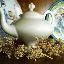

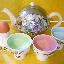

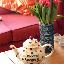

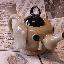

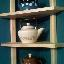

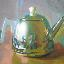

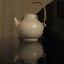

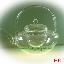

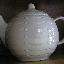

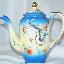

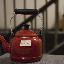

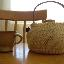

In [22]:
import pandas as pd
from IPython.display import Image, display

df = pd.read_csv("/home/doved/Data/AAIT/task1/train_data/annotations.csv")

def show_images_with_label(label):
    ldf = df[df["label"] == label]
    ldf = ldf.sample(12)
    paths = ldf["sample"].tolist()
    for imageName in paths:
        display(Image(filename=f"/home/doved/Data/AAIT/{imageName}"))

show_images_with_label(45)

In [23]:
from copy import deepcopy
cassoc = deepcopy(assoc)

Index 99
Guesses:
    569: reel
    5: grey_whale
    901: chain_mail
    29: jaguar
    218: revolver
    720: chainlink_fence
    939: bolo_tie
    247: wreck
    353: oboe
    586: screw
Predicted: 569: reel
Was: reel


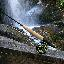

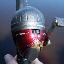

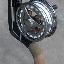

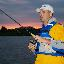

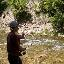

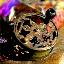

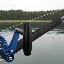

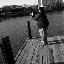

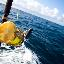

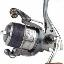

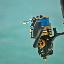

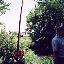

In [30]:
from IPython.display import clear_output
import time

for i in range(100):
    clear_output(wait=True)
    print(f"Index {i}")
    top_guesses = [p[0] for p in per_label[i].most_common(10)]
    print("Guesses:")
    for j in top_guesses:
        print(f"    {j}: {imagenet64_classes[j]}")
    print(f"Predicted: {assoc[i]}: {imagenet64_classes[assoc[i]]}")
    print(f"Was: {imagenet_classes[imagenet_assoc[i]]}", flush=True)
    show_images_with_label(i)
    time.sleep(0.5)
    new_class = input(f"{imagenet64_classes[assoc[i]]}\nCorrect: {imagenet_classes[imagenet_assoc[i]]}") 
    if len(new_class) > 0:
        ok = True
        try:
            new_class = int(new_class)
        except Exception:
            ok = False
        if not ok:
            break
        assoc[i] = new_class

In [44]:
labels = [p[0] for p in per_label[67].most_common(5)]
labels

[901, 585, 969, 440, 737]

Index 42
Guesses:
    821: steel arch bridge
    912: worm fence, snake fence, snake-rail fence, Virginia fence
    839: suspension bridge
    724: pirate, pirate ship
    975: lakeside, lakeshore
Predicted: 821: steel arch bridge


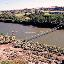

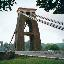

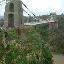

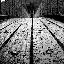

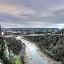

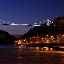

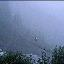

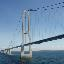

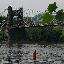

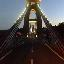

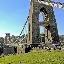

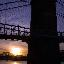

In [93]:
i = 42
print(f"Index {i}")
top_guesses = [p[0] for p in per_label[i].most_common(5)]
print("Guesses:")
for j in top_guesses:
    print(f"    {j}: {imagenet_classes[j]}")
print(f"Predicted: {assoc[i]}: {imagenet_classes[assoc[i]]}", flush=True)
show_images_with_label(i)

In [94]:
assoc[42] = 839

In [75]:
imagenet_classes[821]

'steel arch bridge'

In [96]:
print(assoc)

{61: 349, 66: 440, 28: 187, 13: 372, 16: 105, 56: 525, 81: 957, 89: 542, 12: 781, 34: 912, 53: 424, 98: 123, 82: 79, 72: 964, 85: 774, 41: 73, 86: 470, 46: 970, 5: 917, 95: 411, 32: 69, 3: 414, 21: 739, 99: 758, 27: 954, 7: 877, 93: 315, 47: 978, 60: 283, 20: 400, 59: 675, 8: 705, 45: 849, 23: 862, 90: 532, 74: 500, 71: 311, 2: 810, 73: 744, 76: 430, 38: 570, 43: 511, 33: 806, 10: 683, 1: 932, 18: 354, 54: 842, 22: 308, 40: 496, 58: 50, 31: 286, 39: 910, 94: 887, 77: 458, 69: 821, 30: 457, 52: 25, 19: 325, 83: 619, 0: 314, 15: 158, 64: 526, 11: 448, 42: 839, 68: 438, 75: 975, 51: 32, 24: 207, 25: 614, 29: 474, 78: 761, 92: 75, 6: 627, 17: 689, 9: 625, 97: 567, 48: 540, 57: 109, 50: 480, 37: 938, 14: 704, 44: 747, 67: 737, 70: 612, 84: 734, 80: 678, 36: 733, 63: 281, 49: 367, 26: 114, 4: 341, 35: 652, 62: 1, 79: 945, 91: 760, 96: 71, 55: 425, 87: 482, 65: 765, 88: 447}


In [97]:
assoc_vec = [assoc[i] for i in range(100)]
assoc_vec

[314,
 932,
 810,
 414,
 341,
 917,
 627,
 877,
 705,
 625,
 683,
 448,
 781,
 372,
 704,
 158,
 105,
 689,
 354,
 325,
 400,
 739,
 308,
 862,
 207,
 614,
 114,
 954,
 187,
 474,
 457,
 286,
 69,
 806,
 912,
 652,
 733,
 938,
 570,
 910,
 496,
 73,
 839,
 511,
 747,
 849,
 970,
 978,
 540,
 367,
 480,
 32,
 25,
 424,
 842,
 425,
 525,
 109,
 50,
 675,
 283,
 349,
 1,
 281,
 526,
 765,
 440,
 737,
 438,
 821,
 612,
 311,
 964,
 744,
 500,
 975,
 430,
 458,
 761,
 945,
 678,
 957,
 79,
 619,
 734,
 774,
 470,
 482,
 447,
 542,
 532,
 760,
 75,
 315,
 887,
 411,
 71,
 567,
 123,
 758]

In [98]:
imagenet_classes[1]

'goldfish, Carassius auratus'

In [31]:
assoc_vec = [assoc[i] for i in range(100)]
assoc_vec

[633,
 974,
 542,
 846,
 146,
 929,
 269,
 726,
 265,
 237,
 353,
 838,
 728,
 136,
 526,
 88,
 212,
 879,
 120,
 644,
 895,
 565,
 628,
 593,
 124,
 769,
 653,
 322,
 58,
 835,
 816,
 10,
 600,
 985,
 721,
 865,
 922,
 737,
 970,
 950,
 800,
 599,
 680,
 267,
 845,
 674,
 360,
 366,
 544,
 95,
 547,
 498,
 493,
 704,
 944,
 682,
 719,
 648,
 475,
 283,
 9,
 51,
 449,
 173,
 312,
 309,
 776,
 787,
 990,
 679,
 293,
 631,
 829,
 541,
 712,
 365,
 907,
 715,
 577,
 734,
 594,
 325,
 610,
 813,
 284,
 750,
 590,
 928,
 532,
 798,
 314,
 667,
 606,
 634,
 789,
 844,
 602,
 670,
 617,
 569]

In [34]:
dir(resnet50.fc.weight)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr_

In [ ]:
resnet50.fc.weight.set_

In [36]:
ckpt = torch.load("/home/doved/Downloads/checkpoint-86.pth.tar")["state_dict"]
ckpt.keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we

In [38]:
ckpt["fc.weight"].shape

torch.Size([1000, 2048])

In [41]:
ckpt["fc.weight"][assoc_vec, :].shape

torch.Size([100, 2048])

In [43]:
ckpt["fc.bias"][assoc_vec].shape

torch.Size([100])

In [47]:
resnet50.fc.weight

Parameter containing:
tensor([[-0.0081, -0.0097,  0.0011,  ..., -0.0133, -0.0127,  0.0085],
        [-0.0019,  0.0140, -0.0250,  ..., -0.0080, -0.0202, -0.0104],
        [ 0.0090, -0.0086, -0.0173,  ...,  0.0043, -0.0041,  0.0032],
        ...,
        [-0.0156,  0.0012,  0.0091,  ..., -0.0050, -0.0256, -0.0050],
        [-0.0131,  0.0065, -0.0048,  ..., -0.0041,  0.0036,  0.0081],
        [ 0.0165,  0.0112, -0.0049,  ...,  0.0074,  0.0196, -0.0051]],
       requires_grad=True)

In [53]:
resnet50.fc.weight.data.set_(resnet50.fc.weight.data[assoc_vec, :])
# resnet50.fc.bias.data.set_(resnet50.fc.bias.data[assoc_vec])

tensor([[-0.0067, -0.0298, -0.0128,  ..., -0.0086, -0.0073, -0.0129],
        [-0.0191, -0.0153, -0.0138,  ...,  0.0082, -0.0227,  0.0018],
        [ 0.0037,  0.0036, -0.0062,  ..., -0.0047,  0.0087,  0.0090],
        ...,
        [-0.0155, -0.0111, -0.0111,  ...,  0.0053, -0.0109,  0.0098],
        [-0.0113, -0.0032, -0.0249,  ..., -0.0084, -0.0237, -0.0171],
        [-0.0189,  0.0148, -0.0050,  ..., -0.0014, -0.0113, -0.0154]])

In [54]:
resnet50.fc.weight

Parameter containing:
tensor([[-0.0081, -0.0097,  0.0011,  ..., -0.0133, -0.0127,  0.0085],
        [-0.0019,  0.0140, -0.0250,  ..., -0.0080, -0.0202, -0.0104],
        [ 0.0090, -0.0086, -0.0173,  ...,  0.0043, -0.0041,  0.0032],
        ...,
        [-0.0156,  0.0012,  0.0091,  ..., -0.0050, -0.0256, -0.0050],
        [-0.0131,  0.0065, -0.0048,  ..., -0.0041,  0.0036,  0.0081],
        [ 0.0165,  0.0112, -0.0049,  ...,  0.0074,  0.0196, -0.0051]],
       requires_grad=True)

In [55]:
resnet50.fc.weight.shape

torch.Size([1000, 2048])

In [52]:
len(assoc_vec)

100

In [ ]:
import torch.nn.init

torch.nn.init.uniform_()